# Wnioski

## K-means

Podczas badania algorytmu KMEANS ciekawe rezultaty dały testy dla liczby klastrów, udało się znaleźć wartości, które mogę polepszyć (lub pogorszyć) rezultaty klasteryzacji.

W przypadku jakości klastrów, to mniejsze wartości dają lepsze metryki: silhouette ma duże wartości, a davies małe. Jednak dla tych wartości miary jakości klasyfikacji, rand score (accuracy) i purity(recall) nie są najlepsze. One dają lepsze wyniki dla większej liczby klastrów, chociaż rozróżnialność klastrów jest dużo gorzej.

Metryki dla róznej liczby klastrów
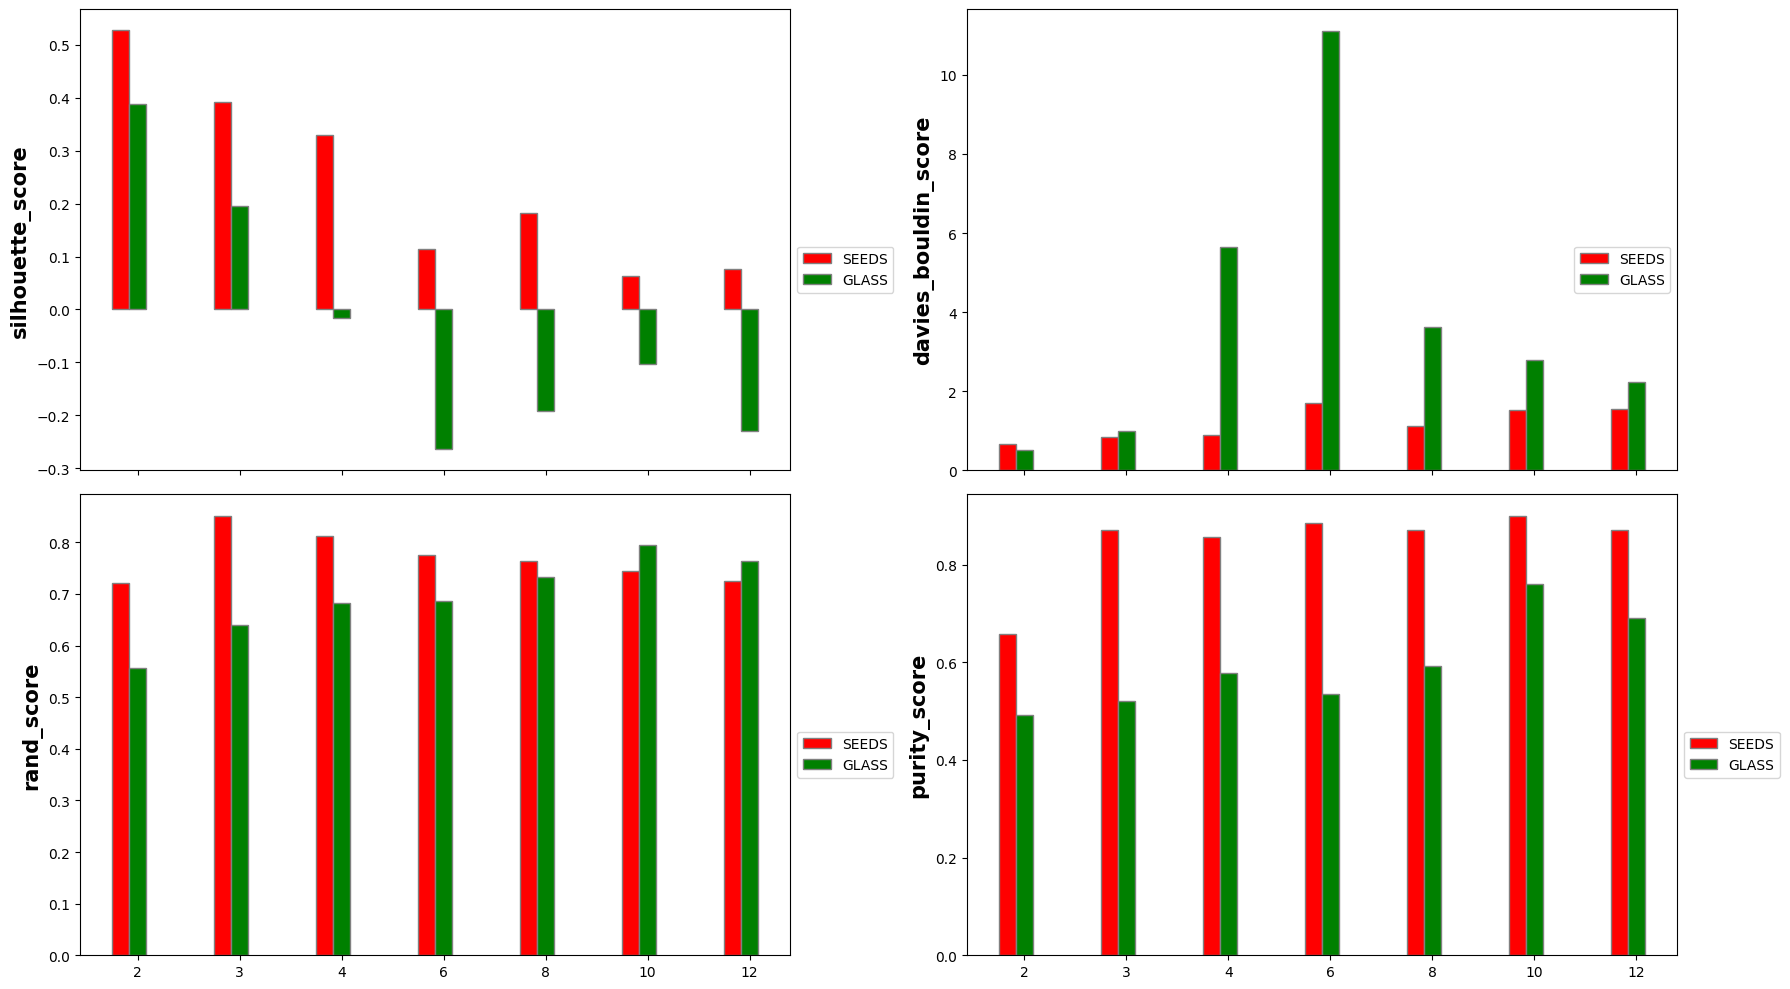

Badanie innych metryk, przedstawionych w zadaniu, nie zmieniły wartości metryk dla różnych wartości, jednak robiło różne troche klastry. 

Wizualizacja klastrów dla różnej liczby restartów
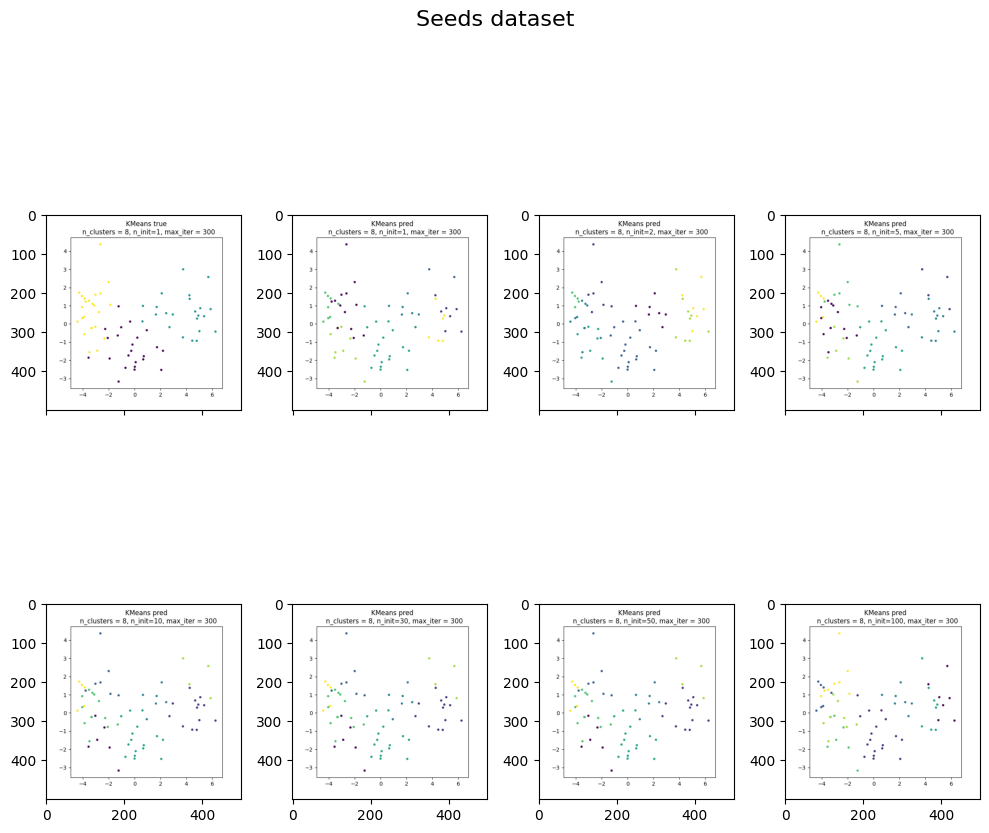

## Badanie DBSCAN

Podczas badania DBSCAN i jego parametrów zozumiałem, że dobry ich dobór bardzo zależy od hcarakterystyk danych.

Duża wartość epsilon (dane są normalizowane) dawała lepszą jakość klastrów, jednak dawała lepsze rand i purity score dla mniejszych wartości

Wykresy metryk dla różnych wartośi epsilon
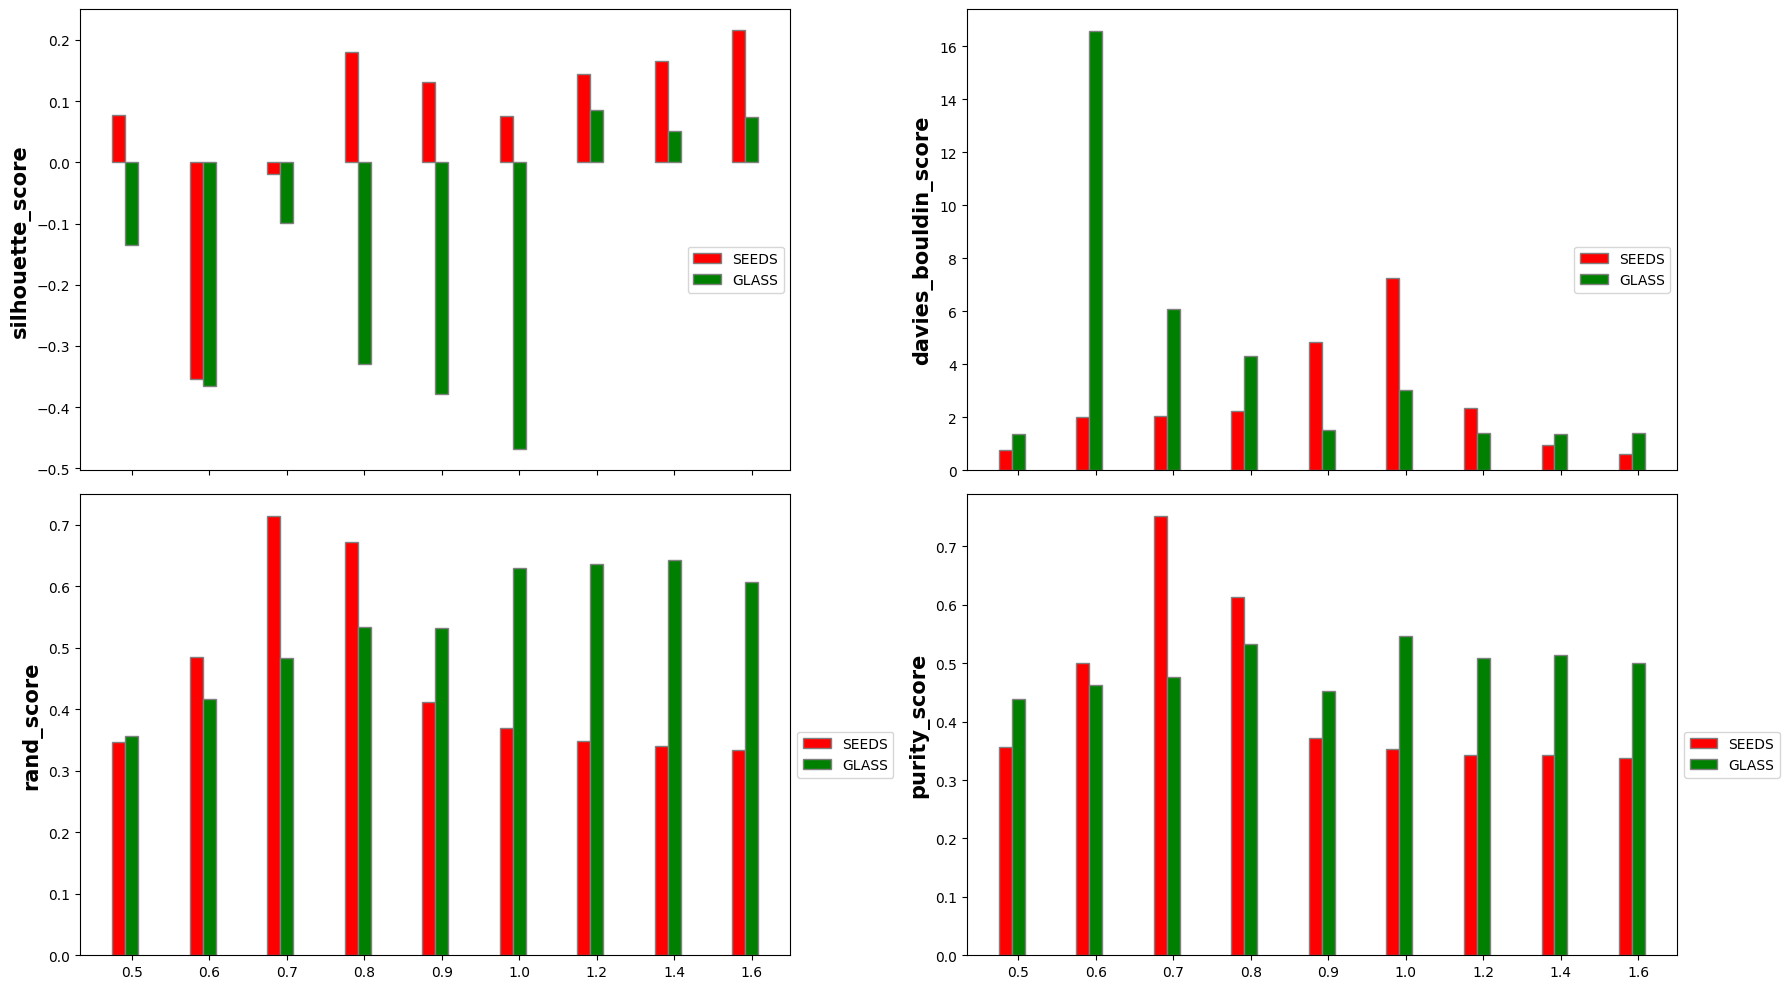

SEEDS

Jeśli zobaczyć wizualizacje dla wysokich wartości jakości klastrów widać, że to głównie jest jeden klaster.

Patrząc na obrazki dla wartości 0.7 i 0.8 widać, że osiągneli takie dobre wyniki klasyfikacji, bo mają największą liczbe klastrów. Porównywając z ground truth możemy zobaczyć, że DBSCAN dał jaj malę klastry, które są mniej więcej wchodzą do oryginalnych, tak i jeden duży klaster, który zajmuję całą przestrzeń. Najprawdopodobniej to wychodzi z powodu wielowymiarowości i możliwie, że selekcja cech mogłaby polepszyć wyniki.

Wizualizacja klastorowania dla różnych wartości epsilon
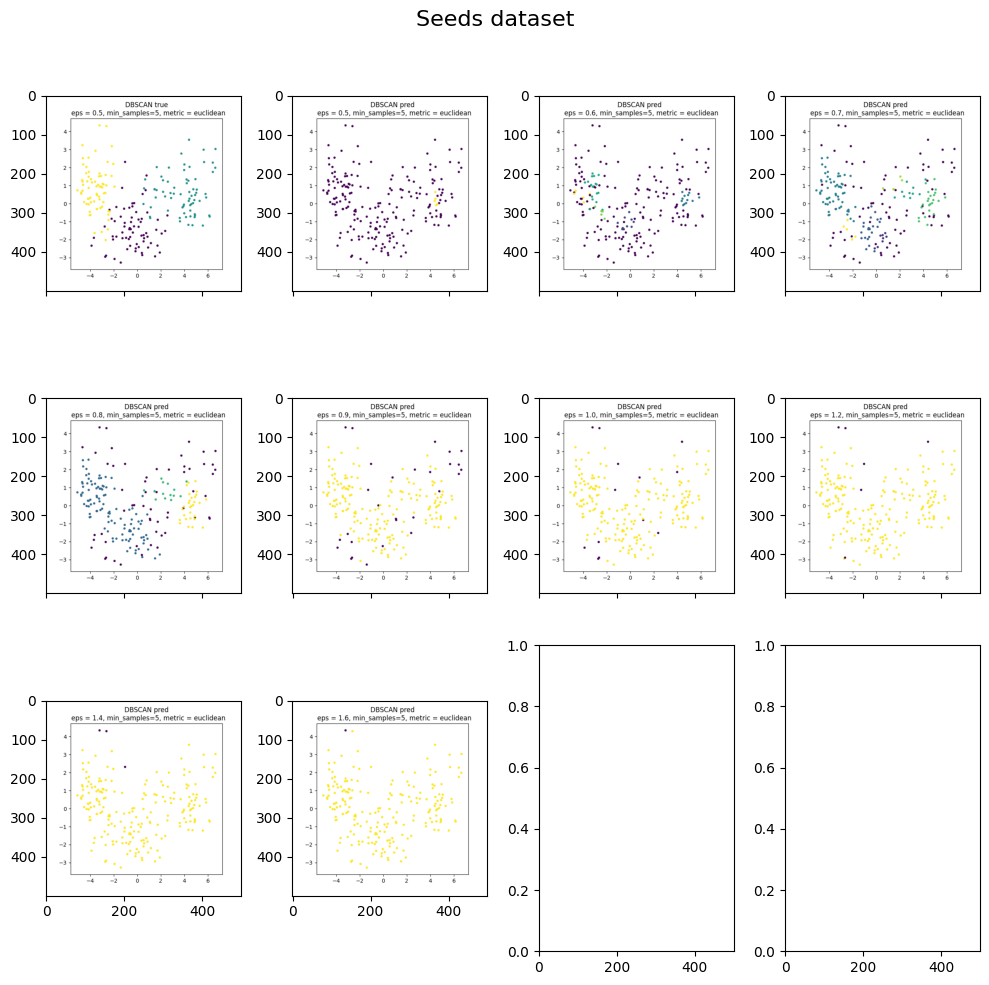

GLASS

Tutaj też mamy tendencje, że mniejsza liczba klastrów zwiększa metryki jakości grupowania, a większa metryki jakości klasyfikacji. 

Jednak dobra wartość epsilon dla tego datasetu jest już inna i algorytm trochę gorzej radzi z tym datasetem.

Wizualizacja klastorowania dla różnych wartości epsilon
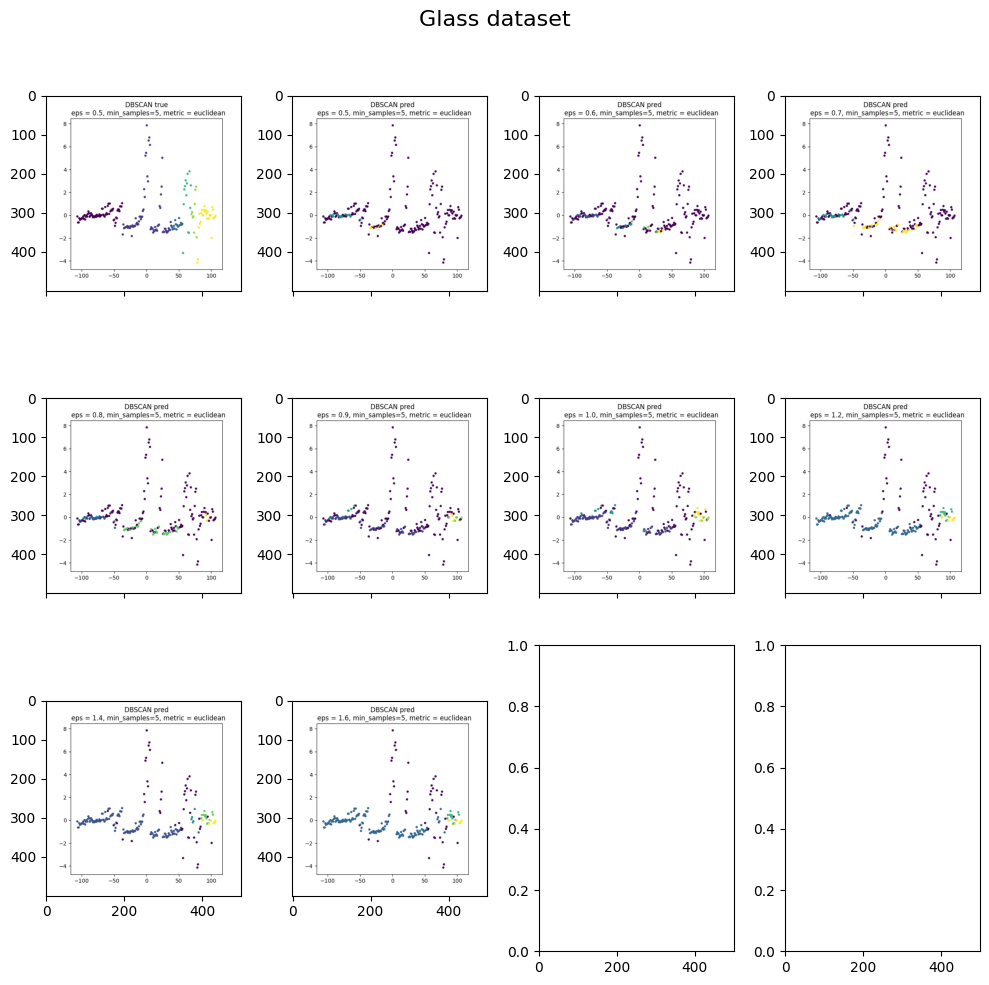

Nie udało się zbadać dużo różnych wartości liczby próbek. Wieksza wartość polepsza obie metryki jakośco klasterowania, kiedy małe polepszają jakość klasyfikacji.

W miejscach, gdzie tylko jakość klasteryzacji jest dobra, robił się tylko jeden klaster mniej więcej.

Metryki dla rożnych wartości liczby probek
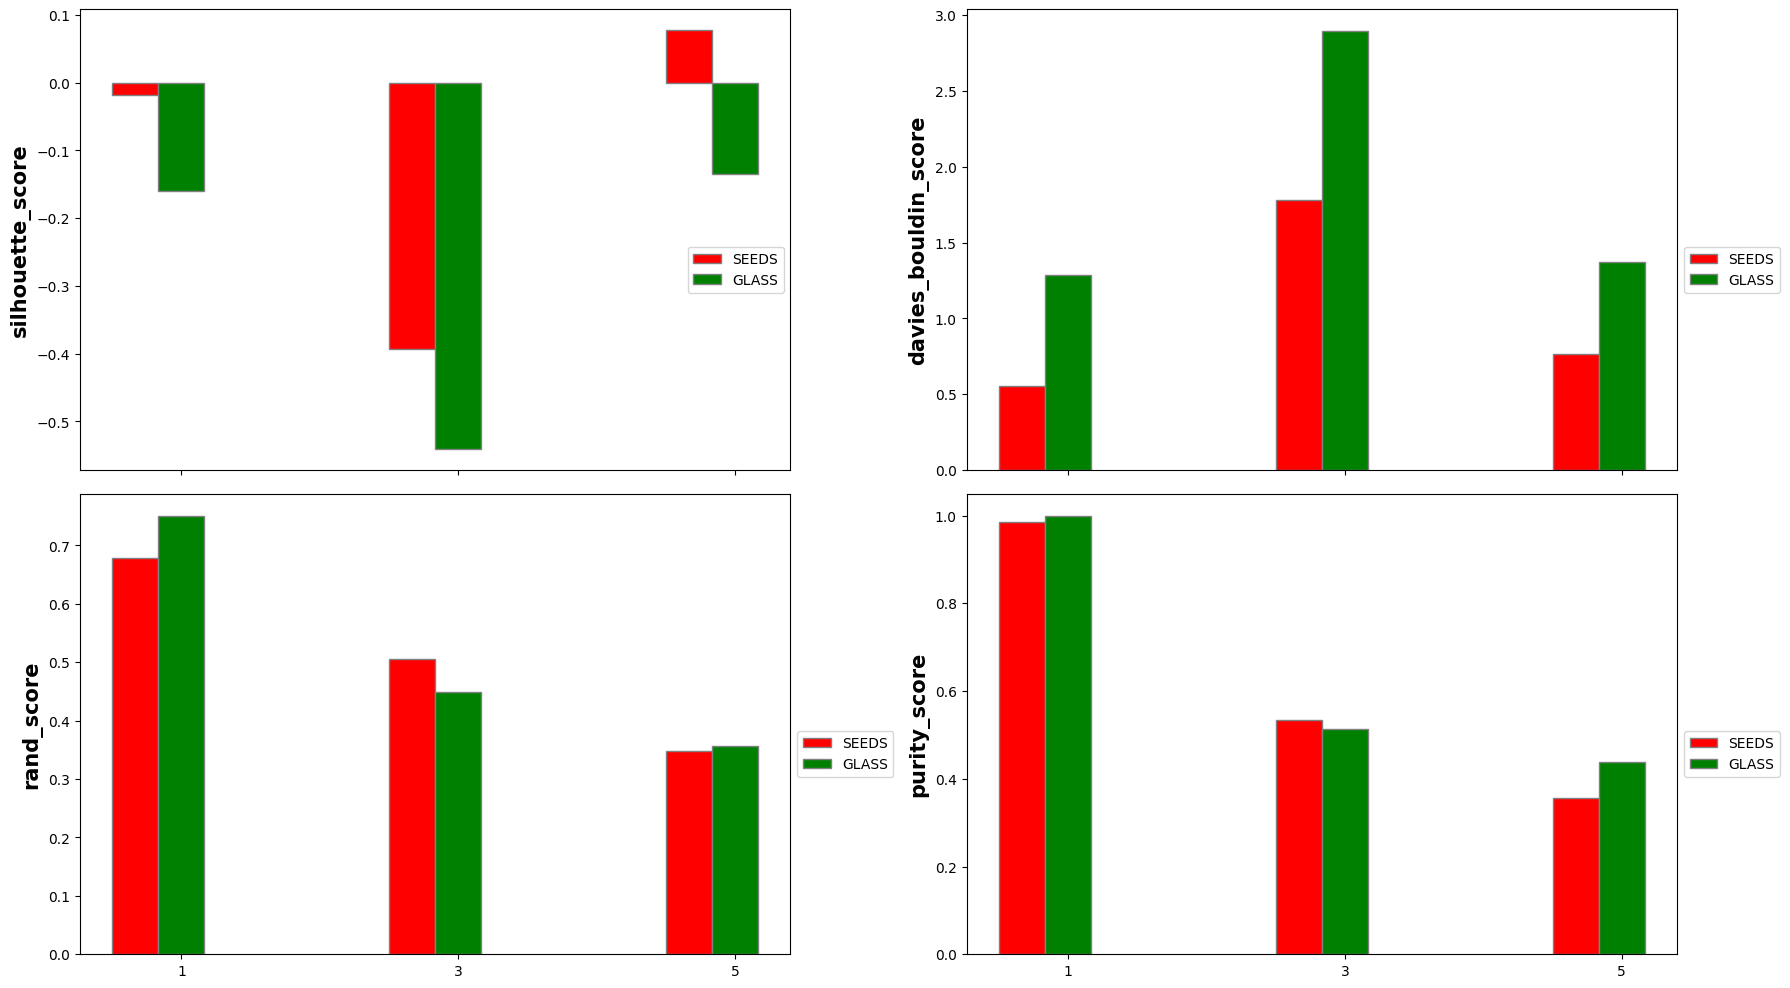

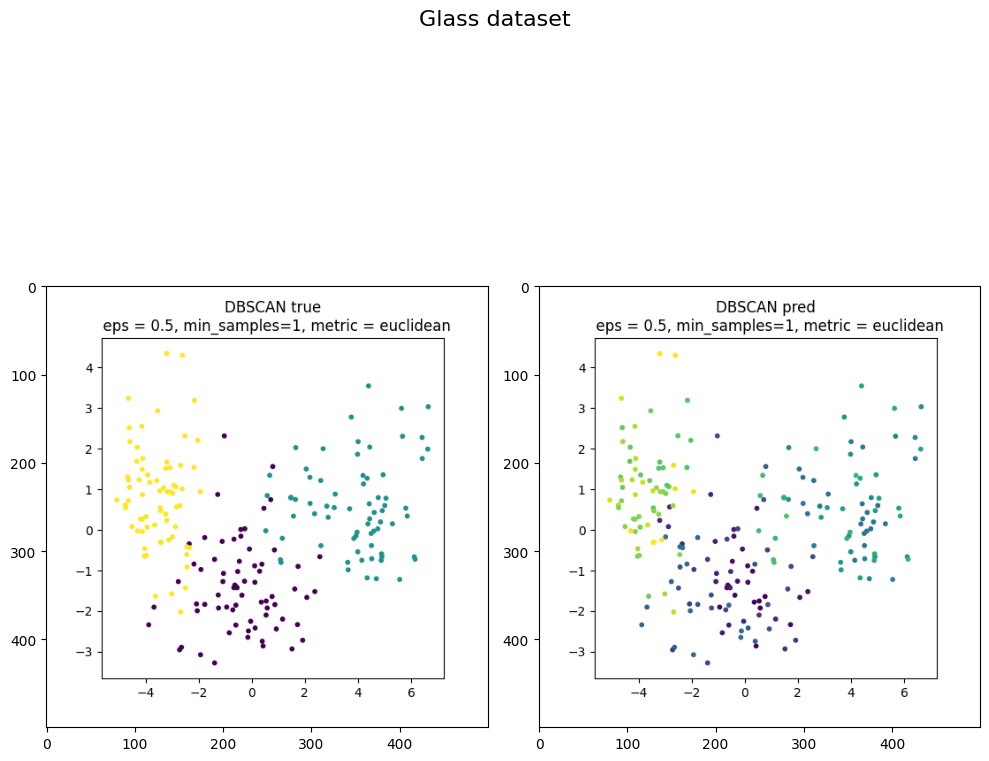
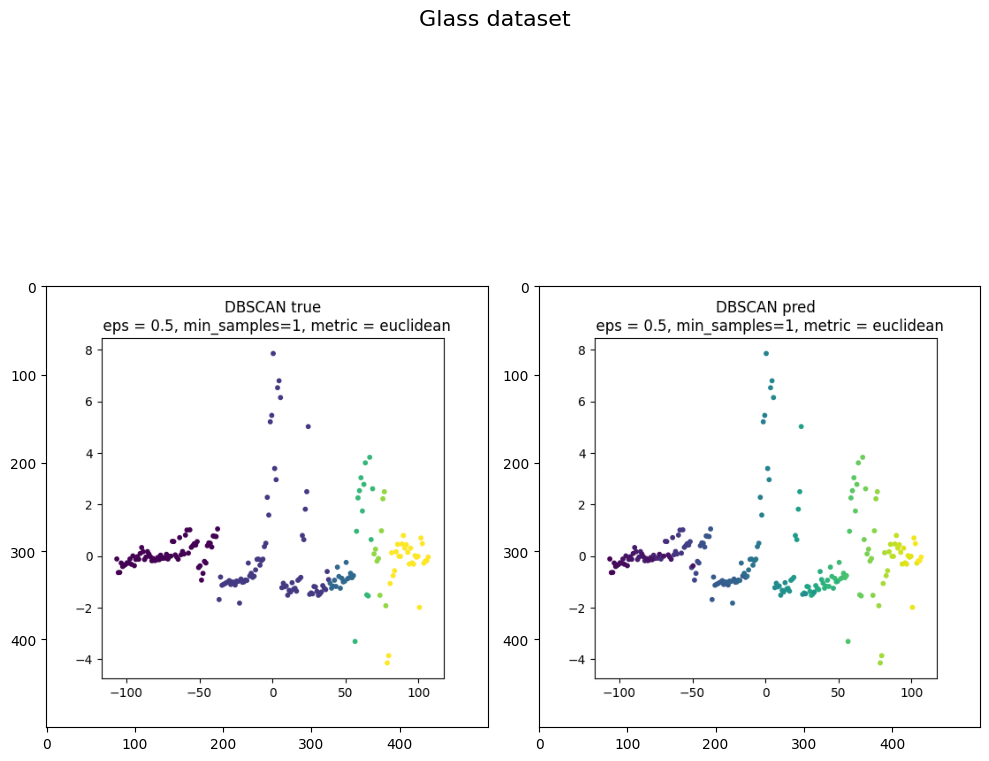

Podczas badania miar odległości okazało się, że dużo tutaj zależy od wartości epsilon. Np dla epsilon 0.5 najlepiej pracowała miara chebyshev. Jednak po wyboru mniej więcej dobrego epsilon dla SEEDS chebyshev dał gorsze rezultaty, bo zgrupował wszystko w jeden klaster, jednak dla GLASS polepszyła się metryka klasyfikacji. I ogolnie pozostałe metryki dały lepsze rezultaty dla epsilon.

Dlatego dobor dobrej metryki zależy nie tylko od charakteru danych , ale też od tego, czy dobrze był dobrany epsilon

Epsilon = default (0.5)
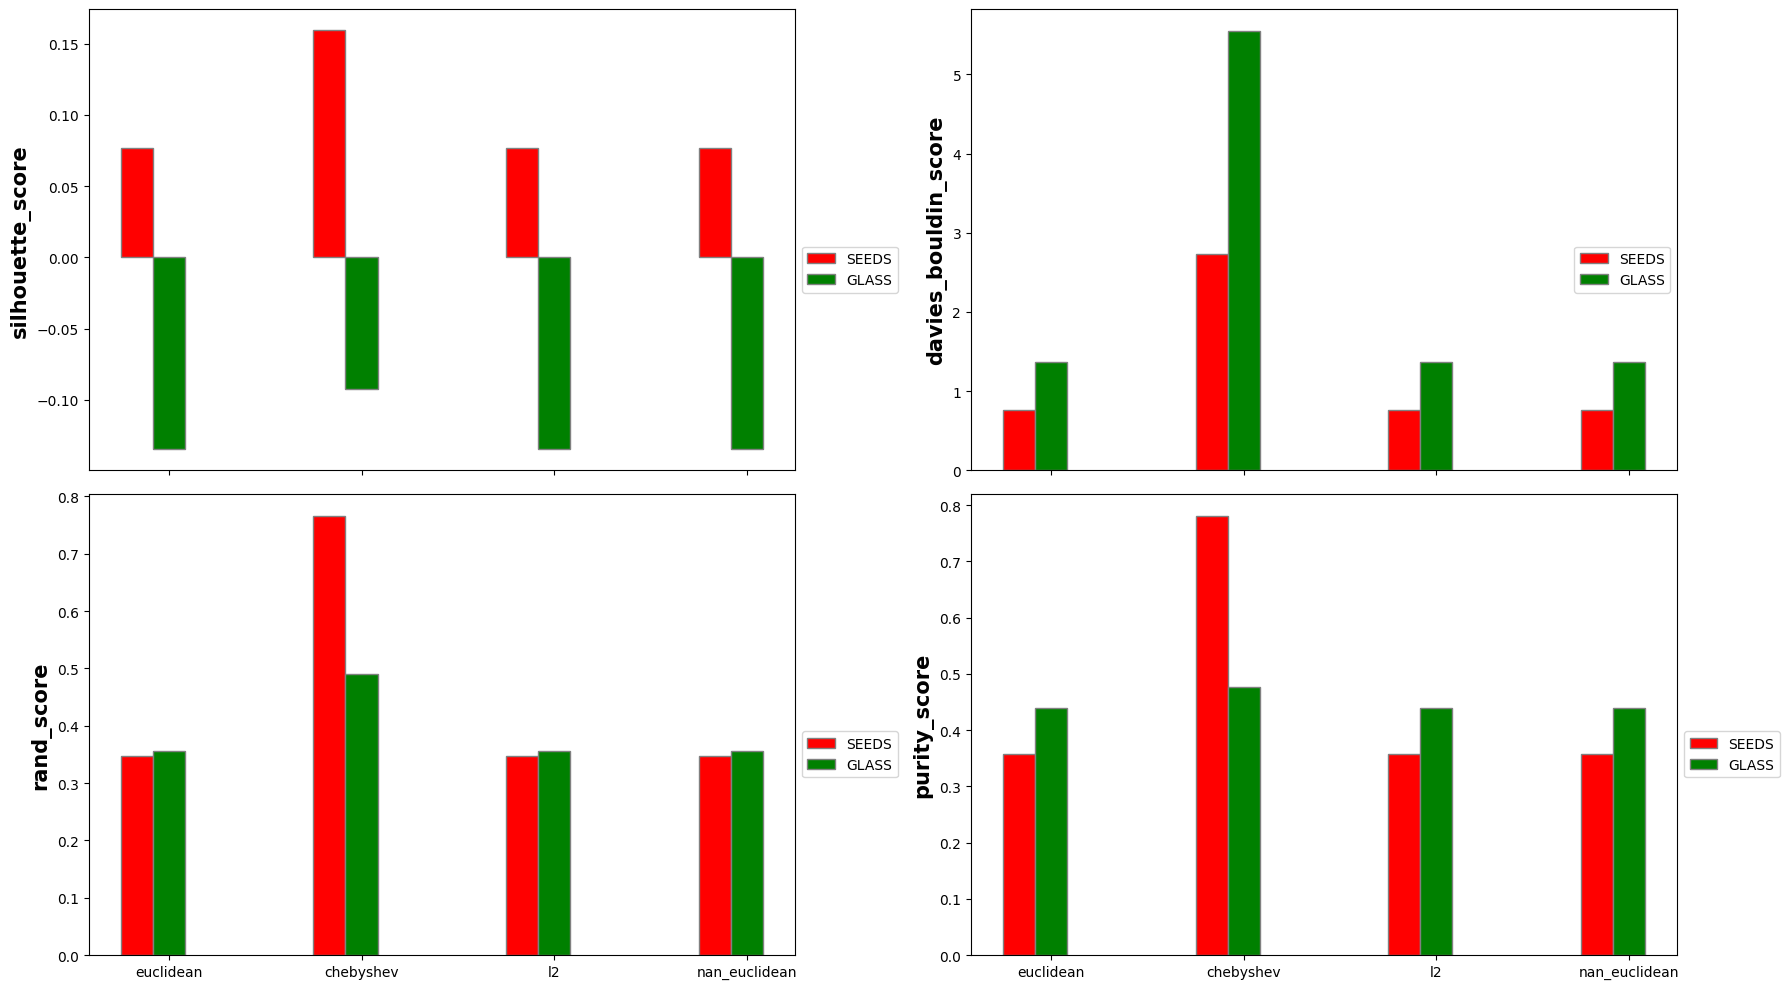
Epsilon = 0.8
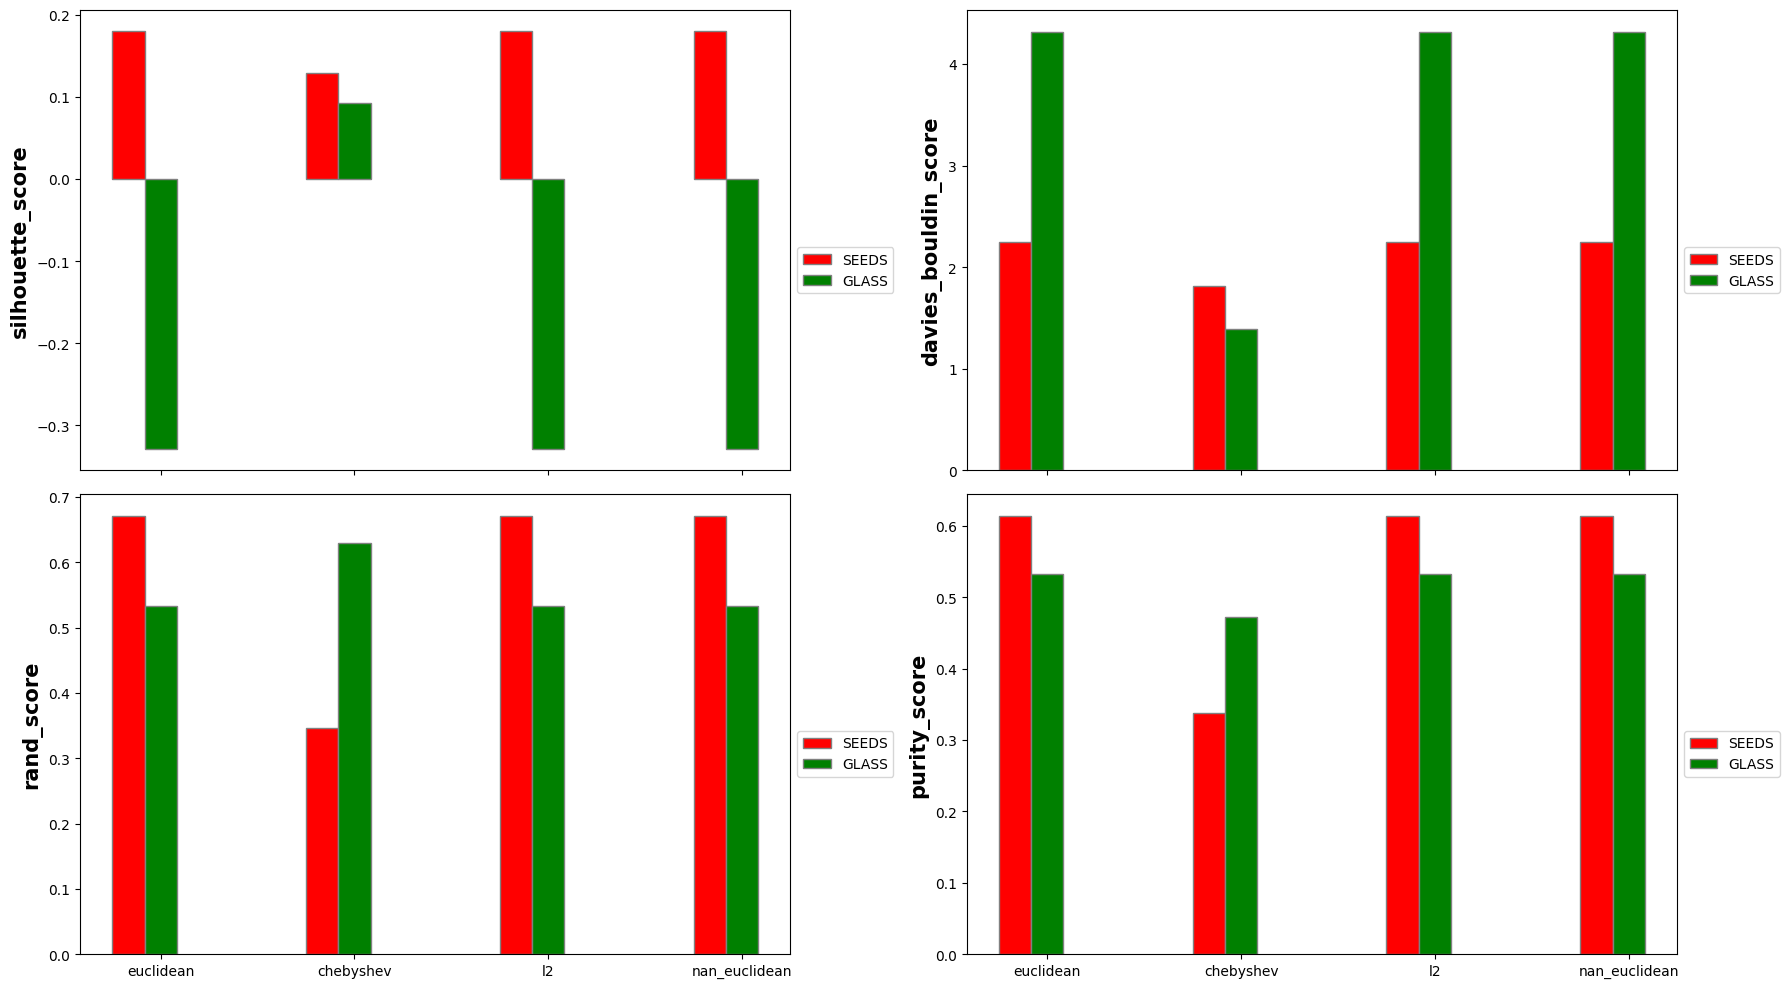

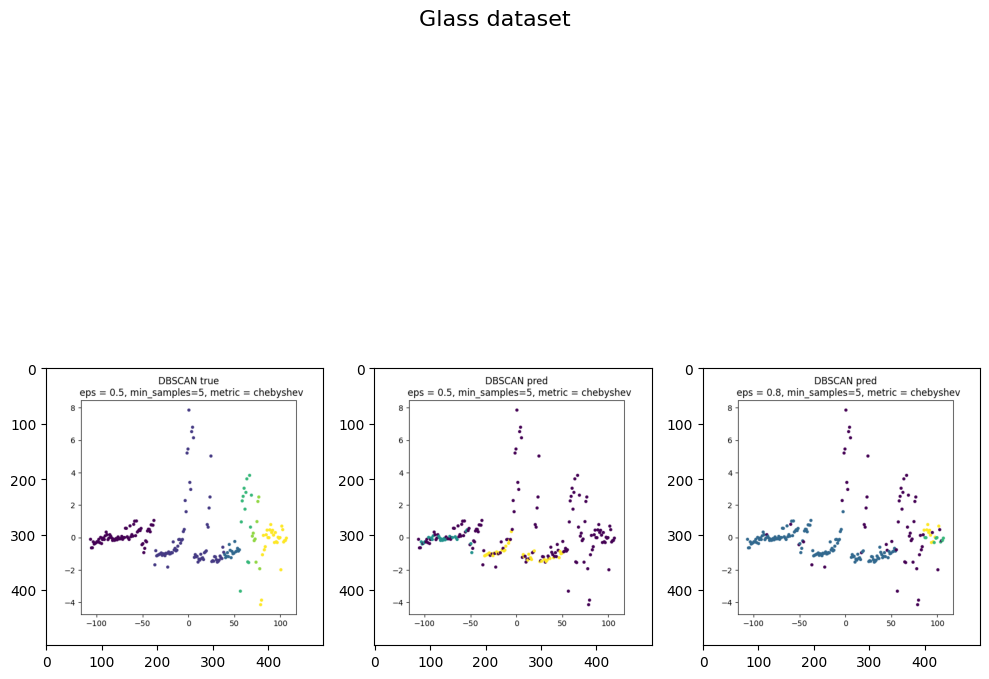
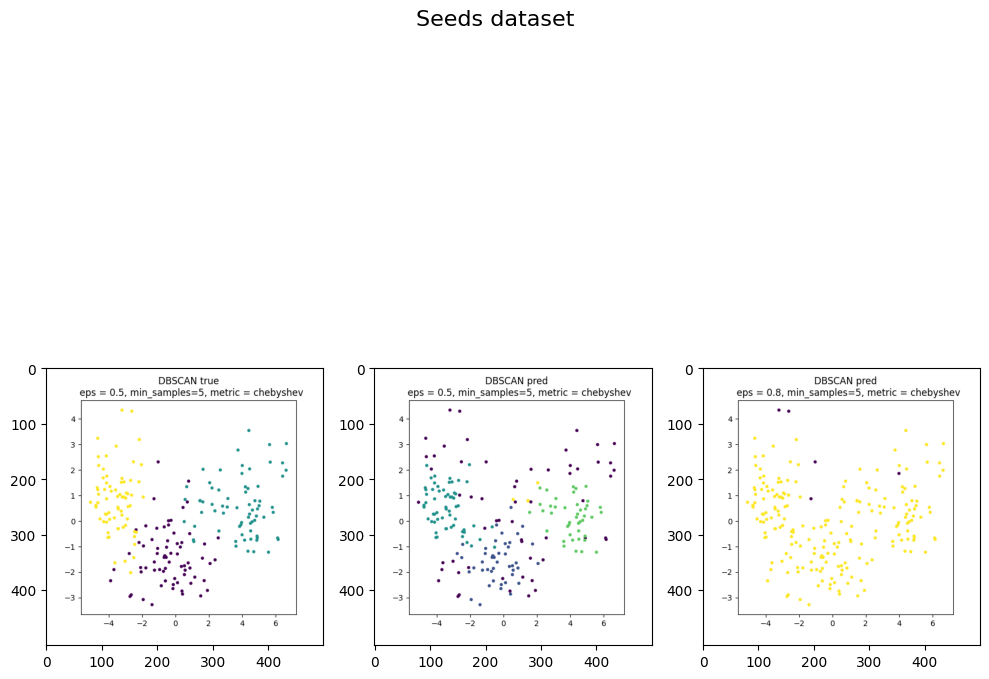

Ogolny wniosek odnośnie tego algorytmu to to, że tutaj wydajność bardziej zależy od dobrego doboru parametrow, a wydajność niektorych parametrow zależy od dobrego doboru innych

## Badanie działania DBSCAN na zbiorze PCB

Proces badania działania algorytmu za zbiorze PCB zdecydowałem zrobić w następny sposob: na małym podzbiorze danych przetestować wybrane wartości hiperparametrow metodą gridsearch. Potem przeanalizować metryki dla najlepszych wartości co metryk, a potem przetestować działanie dla wybranych hiperparametrow na większym zbiorze danych.

Najciekawsze metryki dały przypadki dla maksymalnego rand i purity score.

Po głębszej analizie przypadku z purity score zobaczyłem, że to jest przypadek z większą liczbą klastrow, co i powodowało dużą wartość purity score, dlatego zdecydowałem przetestować działanie na konfiguracji z rand score

Wizualizacja przypadku z największym purity score

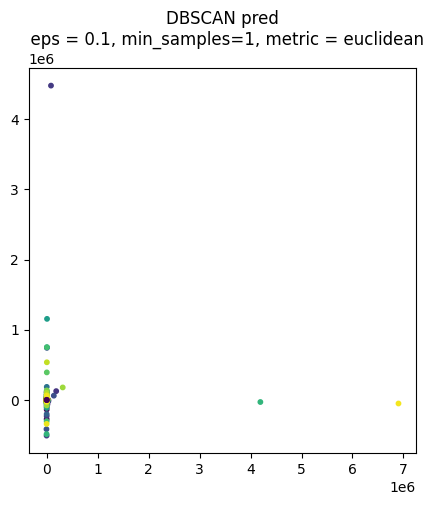

W teście przypadku z najlepszym rand score zobaczyłem, że tutaj powstał mały problem z tym, że PCA nie do końca radzi z tym datasetem, chociaż możemy zobaczyć tutaj 2 klastry. Dla leprzej wizualizacji wykorzystałem t-sne.

Wizualizacja działania algorytmu w PCA

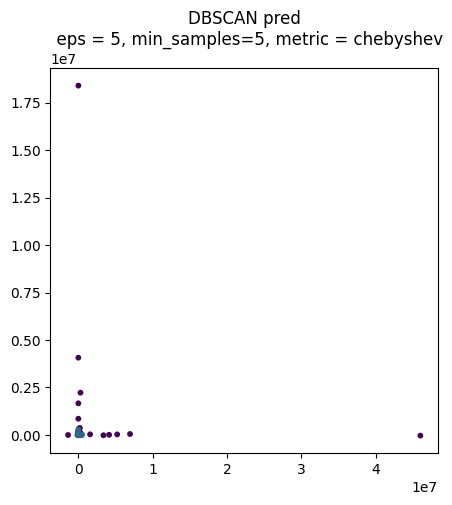

Niestety po zbadaniu wizualizacji t-sne się wykryło, że model średnio zdążył podzielić zbior na dwie części. Wykrył dwa klastry, ale klastr klasy docelowej jest słabo podobny do ground truth. Najprawdopodobniej głowna przyczyna dobrej wartości rand score to niezbalansowaność klas, a pewny podział na klastry tylko troche polepszył wynik tej metryki.

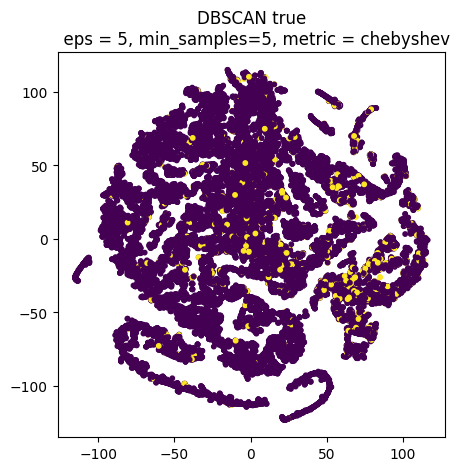
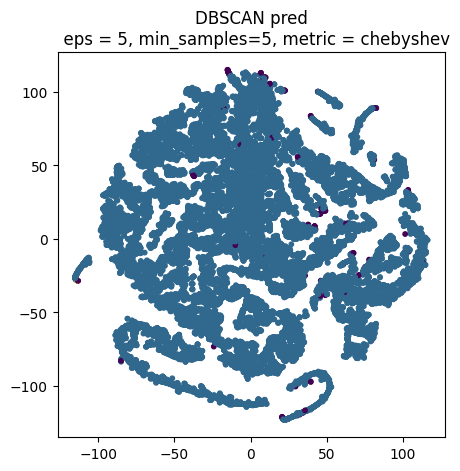

W końcu nie udało się dobrze dopasować hiperparametry do zbioru, bo dane są niezbalansowane dla tego klasyfikatora. Dodatkowo prawdziwe klastry nie są dobrymi, co też powoduje złą prace algorytmu. 

# Część techniczna

In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy
import pandas as pd 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.io import arff

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'pepal length', 'pepal width'])
df_iris = pd.concat([df_iris, pd.DataFrame(iris.target, columns=['name'])], axis=1 )

In [3]:
import requests

data_seeds_raw = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt')
data_seeds = ''
for data in (data_seeds_raw.iter_content()):
    data_seeds = data_seeds + data.decode("utf-8") 

data_seeds_split = data_seeds.split('\n')
data_seeds = []

for x in data_seeds_split:
    if x != '':
        data_seeds.append([float(xx) for xx in x.split('\t') if xx != ''])

data_seeds = numpy.array(data_seeds)

df_seeds = pd.DataFrame(data_seeds)

df_seeds = df_seeds.astype({7: int})
df_seeds = df_seeds.rename(columns = {7: 'name'})
df_seeds.columns = df_seeds.columns.astype(str)

In [4]:
import requests

data_glass_raw = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')

data_glass = ''
for data in (data_glass_raw.iter_content()):
    data_glass = data_glass + data.decode("utf-8") 
data_glass_split = data_glass.split('\n')
data_glass = []
for x in data_glass_split:
    if x != '':
        data_glass.append([float(xx) for xx in x.split(',')])
    

data_glass = numpy.array(data_glass)

df_glass = pd.DataFrame(data_glass)

df_glass = df_glass.astype({10: int})
df_glass = df_glass.rename(columns = {10: 'name'})
df_glass.columns = df_glass.columns.astype(str)

In [5]:
data1 = arff.loadarff('1year.arff')
data2 = arff.loadarff('2year.arff')
data3 = arff.loadarff('3year.arff')
data4 = arff.loadarff('4year.arff')
data5 = arff.loadarff('5year.arff')
df_bank = pd.DataFrame(data1[0])
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data2[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data3[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data4[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data5[0]), ignore_index = True))

df_bank.loc[df_bank['class'] == b'1','class'] = 1
df_bank.loc[df_bank['class'] == b'0','class'] = 0

df_bank['class'] = df_bank['class'].astype('int')

for column in df_bank.iloc[:, :-1]:
    median = df_bank[column].median()
    df_bank = df_bank.fillna(df_bank[column].fillna(median).to_frame())


C:\Users\Daniel\AppData\Local\Temp\ipykernel_19500\890971768.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data2[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_19500\890971768.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data3[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_19500\890971768.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data4[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_19500\890971768.py:10: FutureWarning: The frame.append method is deprecated and will be removed f

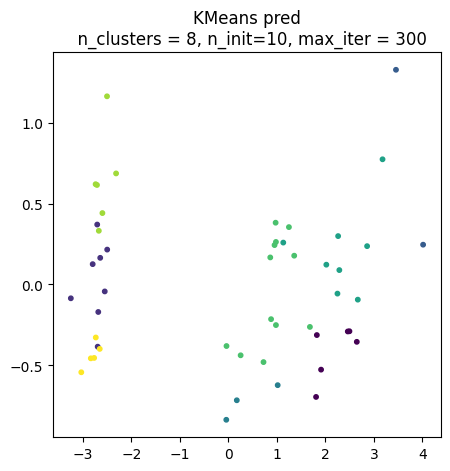

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.cluster import rand_score, contingency_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score

def run_kmeans(df, n_clusters = 8 , n_init = 10, max_iter = 300):
    df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)    
    clf = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, random_state=42)
    clf = Pipeline([('imputate', SimpleImputer( strategy='mean')),
                    ('standardization', StandardScaler()),
                    ('clf', clf),])
    clf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    y_true = df_test.iloc[:, -1].tolist()
    y_pred = clf.predict(df_test.iloc[:, :-1])

    rand_sc = rand_score(y_true, y_pred)
    contingency_mat = contingency_matrix(y_true, y_pred)
    purity_sc = np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat) 


    silhouette_sc = silhouette_score(df_test.iloc[:, :-1], y_pred)
    davies_bouldin_sc = davies_bouldin_score(df_test.iloc[:, :-1], y_pred)
    
    X_reduced = PCA(n_components=2).fit_transform(df_test)

    pred_fig = plt.figure(1, figsize=(5, 5))
    ax1 = pred_fig.add_subplot()
    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_pred)
    ax1.set_title(f"KMeans pred\n  n_clusters = {n_clusters}, n_init={n_init}, max_iter = {max_iter}")
    plt.close()

    true_fig = plt.figure(2, figsize=(5, 5))
    ax2 = true_fig.add_subplot()
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_true)
    ax2.set_title(f"KMeans true\n  n_clusters = {n_clusters}, n_init={n_init}, max_iter = {max_iter}")
    plt.close()

    
    return {'silhouette_score': silhouette_sc, 'davies_bouldin_score': davies_bouldin_sc,
             'rand_score': rand_sc, 'purity_score': purity_sc ,
              'pred_fig': pred_fig, 'true_fig': true_fig,}

test_run = run_kmeans(df_iris)
test_run['pred_fig']

In [7]:
import math

def plotStatistics(df, metrics, col_names, dataset_names, colours):
    size = math.ceil(len(metrics)/2)
    fig, axes = plt.subplots(size, size, sharex=True, sharey=False, figsize=(18, 10))
    
    for i in range(len(metrics)):
        col_id = i % size
        row_id = i // size


        y = [[exp_data[metrics[i]] for exp_data in ds_data ] for ds_data in df]

        barWidth =1 / (len(y) + 4)

        brs = []
        brs.append(np.arange(len(y[0])))

        for j in range(1, len(y)):
            brs.append([x + barWidth for x in brs[j-1]])

        for j in range(len(y)):
            axes[row_id][col_id].bar(brs[j], y[j], color = colours[j], width = barWidth,
                edgecolor ='grey', label =dataset_names[j])

        # axes[row_id][col_id].set_xlabel('Value', fontweight ='bold', fontsize = 15)
        axes[row_id][col_id].set_ylabel(metrics[i], fontweight ='bold', fontsize = 15)
        axes[row_id][col_id].set_xticks([r + barWidth for r in range(len(y[0]))],
                col_names)

        axes[row_id][col_id].legend(bbox_to_anchor=(1, 0.5), fancybox=True)

    plt.tight_layout()

# plotStatistics(results_list_criterion, ['silhouette_score', 'davies_bouldin_score', 'rand_score', 'purity_score'], ['a', 'b'], ['IRIS', 'SEEDS', 'GLASS', 'PCB'], ['r', 'g', 'b', 'c'])


In [8]:
from io import BytesIO

def combineFigsInOnePlot(dict_list, plot_name = ''):
    size_width = min(4, len(dict_list) + 1)
    size_height = math.ceil((len(dict_list) + 1)/size_width)
    fig, axes = plt.subplots( size_height, size_width, sharex=True, sharey=False, figsize=(10, 10))
    
    buffer_tru = BytesIO()
    dict_list[0]['true_fig'].savefig(buffer_tru, format='png')
    buffer_tru.seek(0)
    image_true_data = plt.imread(buffer_tru)

    if size_height > 1:
        axes[0][0].imshow(image_true_data)
    else:
        axes[0].imshow(image_true_data)
    
    for i in range(len(dict_list)):
        col_id = (i + 1) % size_width
        row_id = (i + 1) // size_width

        buffer = BytesIO()
        dict_list[i]['pred_fig'].savefig(buffer, format='png')
        buffer.seek(0)
        image_data = plt.imread(buffer)

        if size_height > 1:
            axes[row_id][col_id].imshow(image_data)
        else:
            axes[col_id].imshow(image_data)
    
    fig.suptitle(plot_name, fontsize=16)
    plt.tight_layout()


In [9]:
metrics_list = ['silhouette_score', 'davies_bouldin_score', 'rand_score', 'purity_score']
dataset_list = ['SEEDS', 'GLASS']
colour_list = ['r', 'g', 'b', 'c']

# Badanie k-means

In [10]:
print(len(np.unique(df_iris.iloc[:, -1])))
print(len(np.unique(df_seeds.iloc[:, -1])))
print(len(np.unique(df_glass.iloc[:, -1])))
print(len(np.unique(df_bank.iloc[:, -1])))

3
3
6
2


## Sprawdzenie liczby klastrów

In [11]:

study_vals = [2, 3, 4, 6, 8, 10, 12]
results_list = [
[run_kmeans (df_seeds, n_clusters = c) for c in study_vals],
[run_kmeans (df_glass, n_clusters = c) for c in study_vals],
]


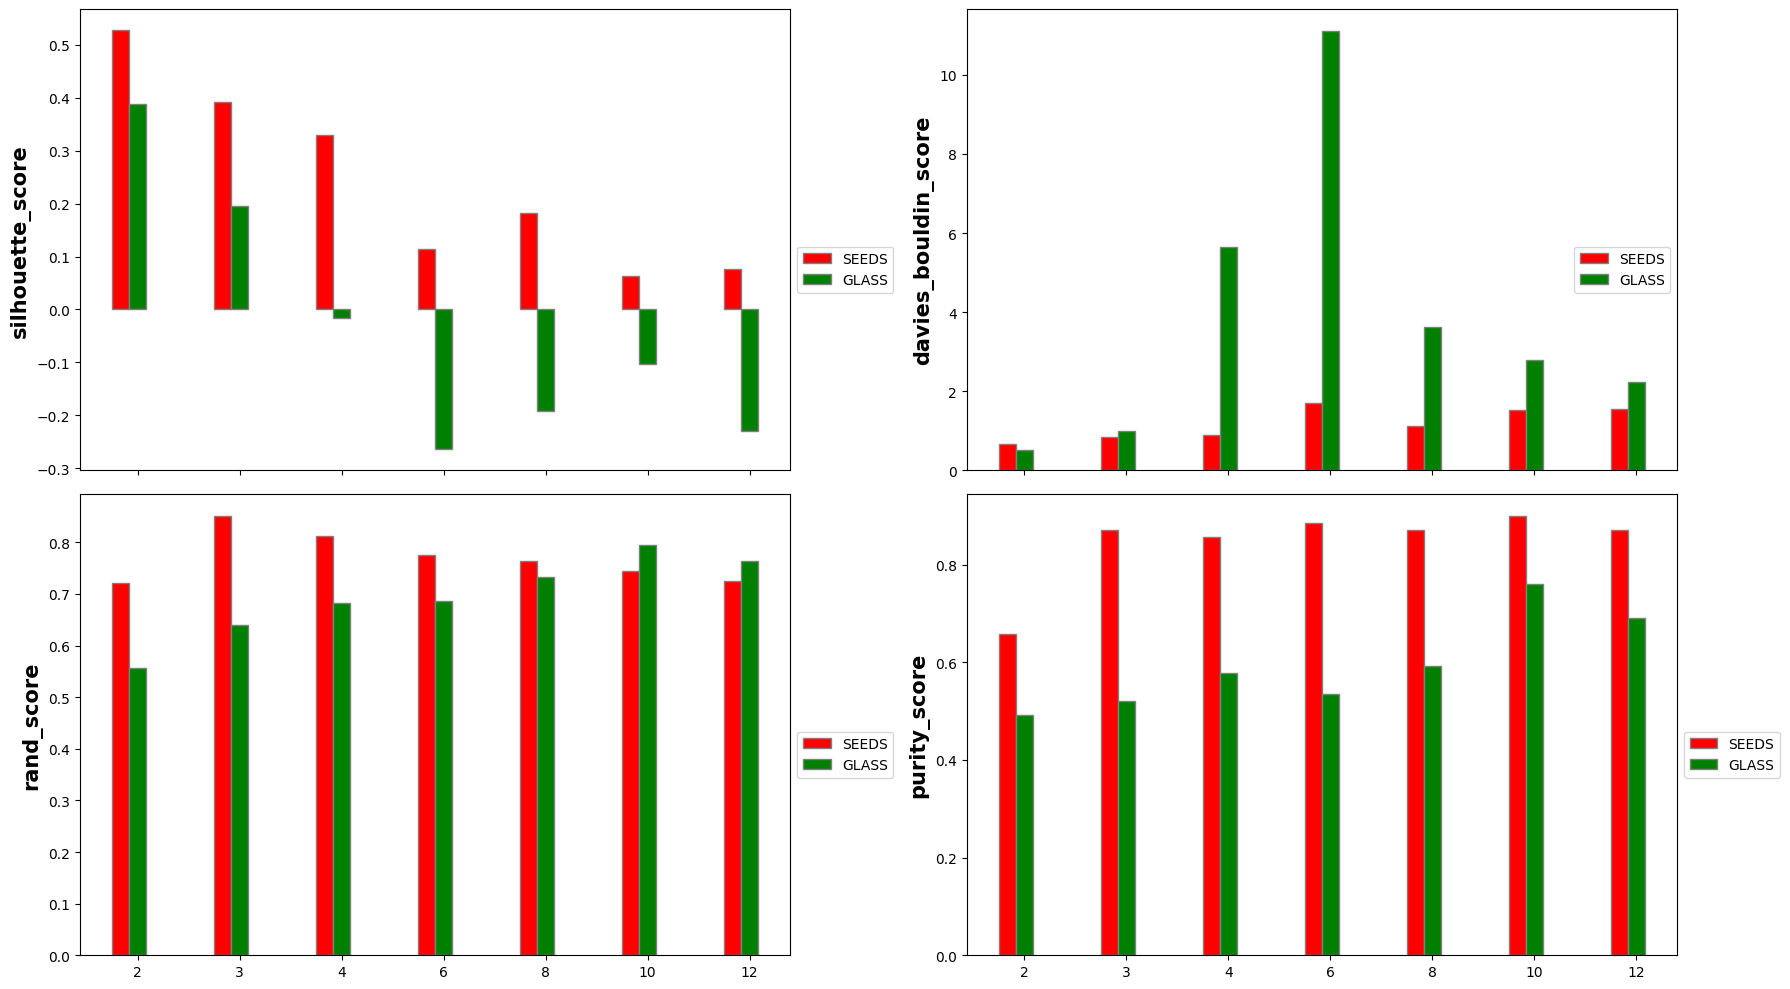

In [12]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

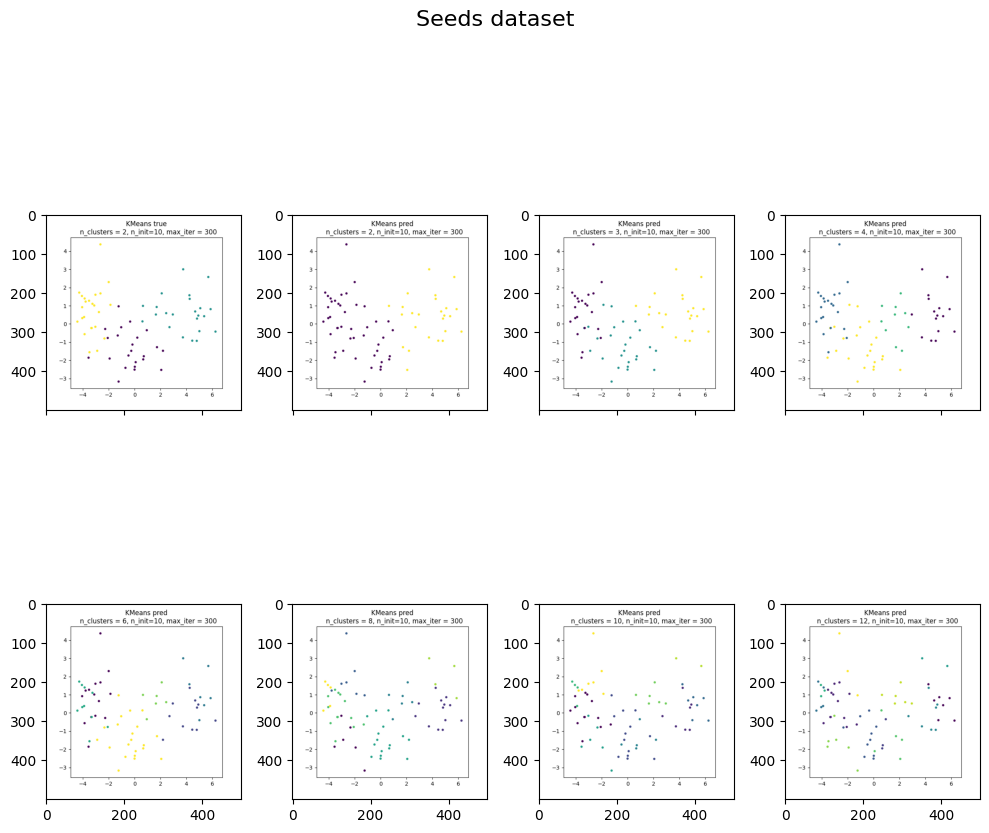

In [13]:
combineFigsInOnePlot(results_list[0], 'Seeds dataset')

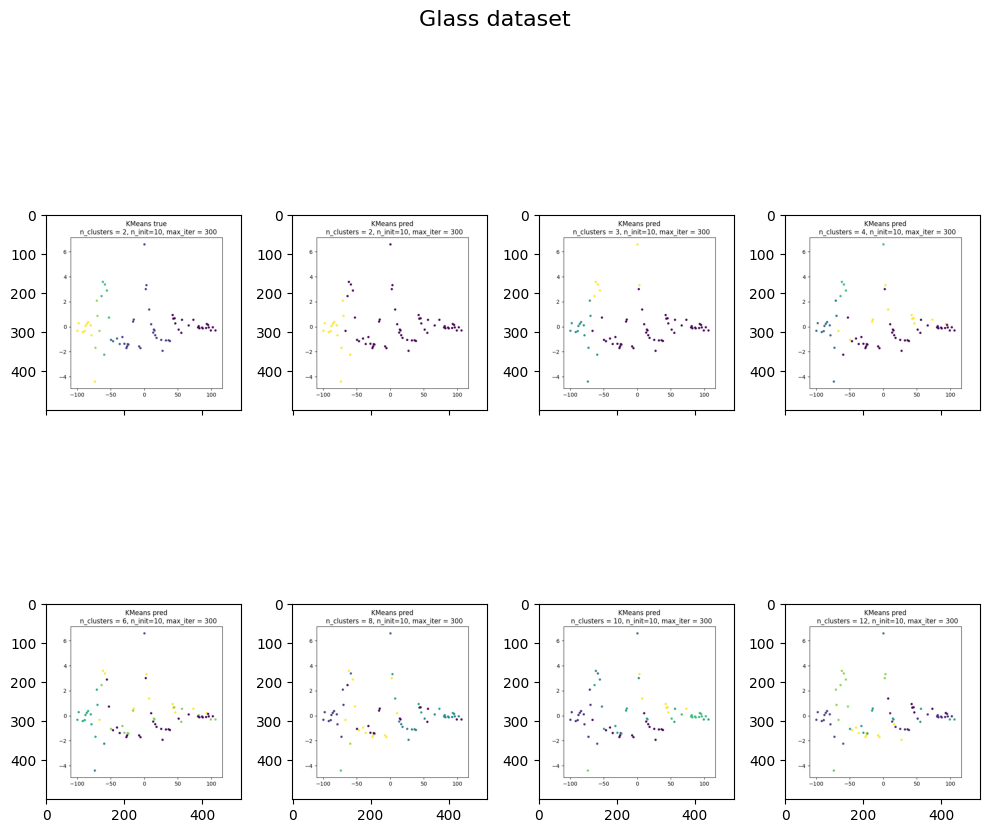

In [14]:
combineFigsInOnePlot(results_list[1], 'Glass dataset')

## Badanie liczby restartów

In [15]:
study_vals = [1, 2, 5, 10, 30, 50, 100]
results_list = [
[run_kmeans (df_seeds, n_init = c) for c in study_vals],
[run_kmeans (df_glass, n_init = c) for c in study_vals],
]


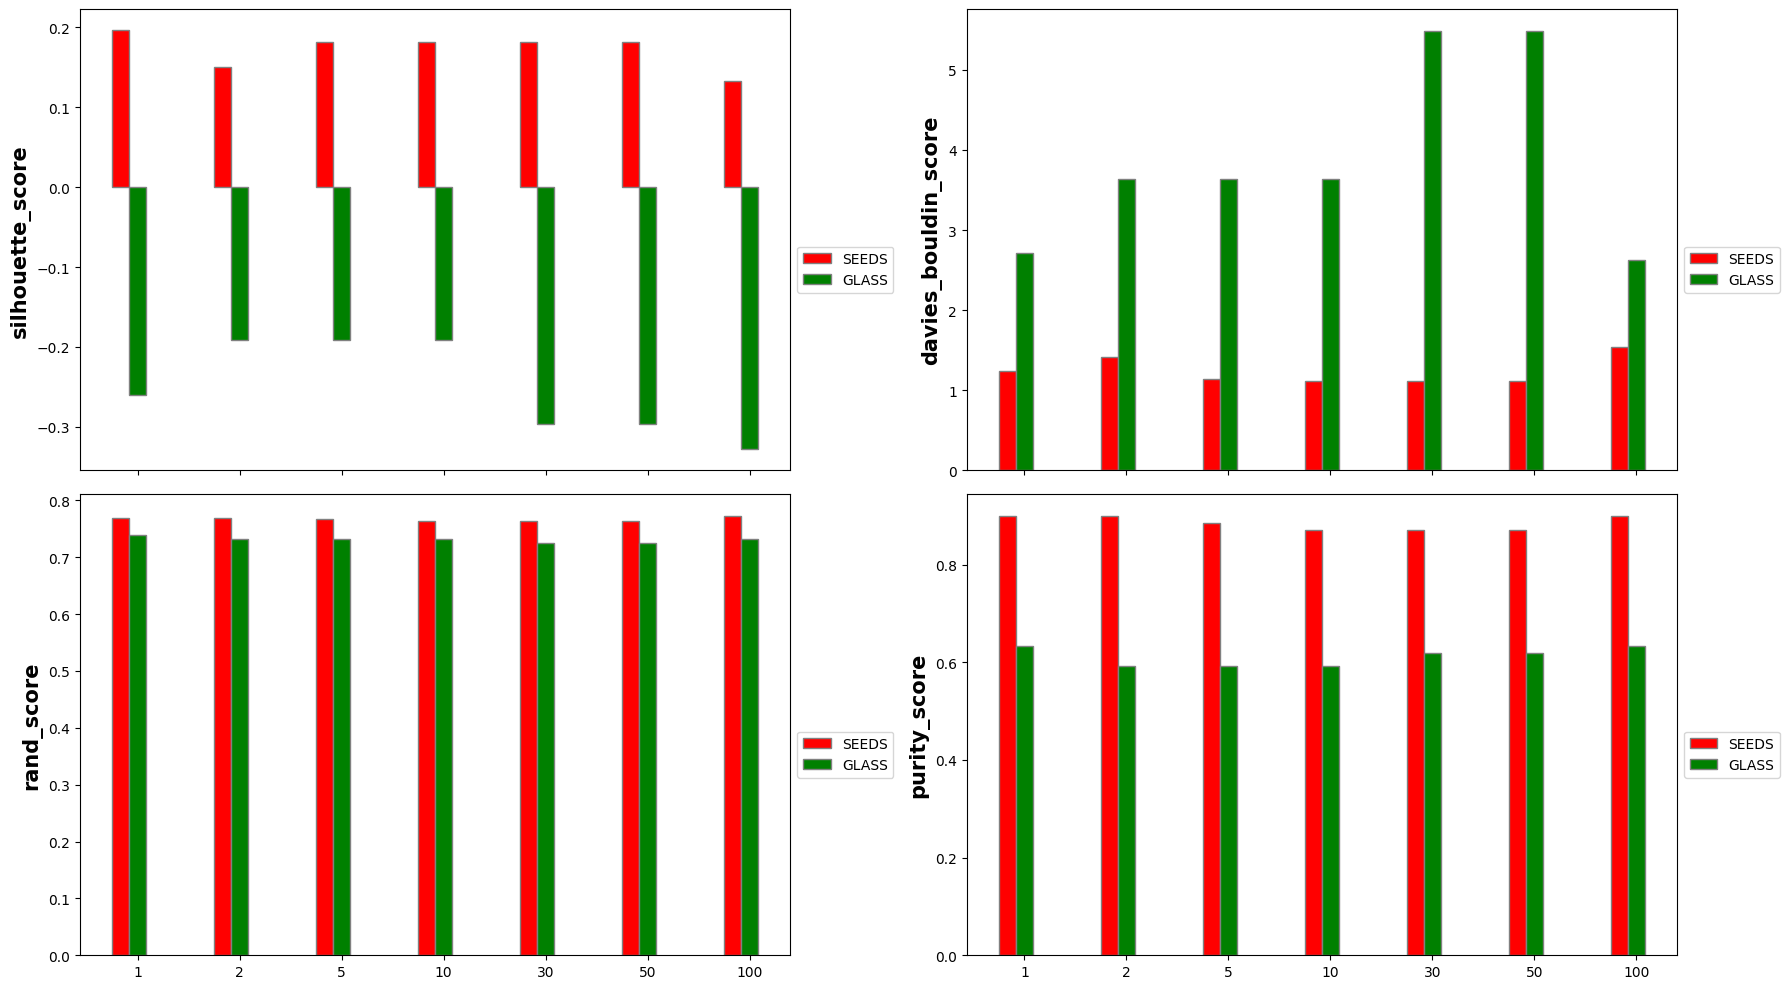

In [16]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

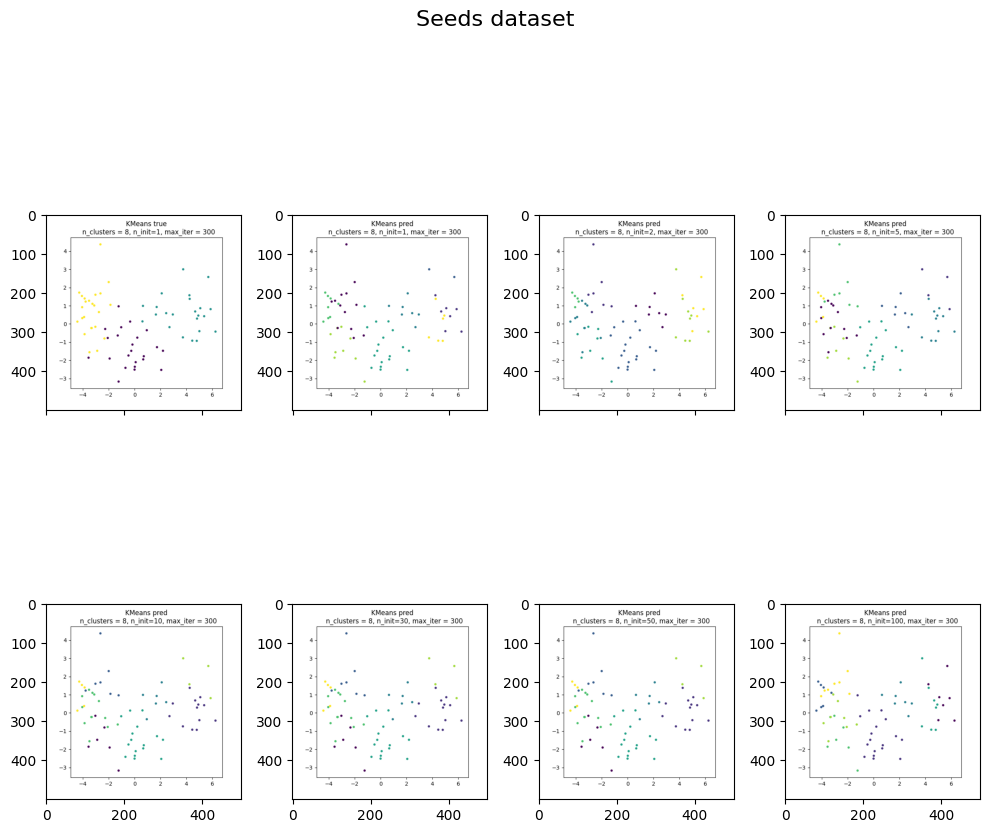

In [17]:
combineFigsInOnePlot(results_list[0], 'Seeds dataset')

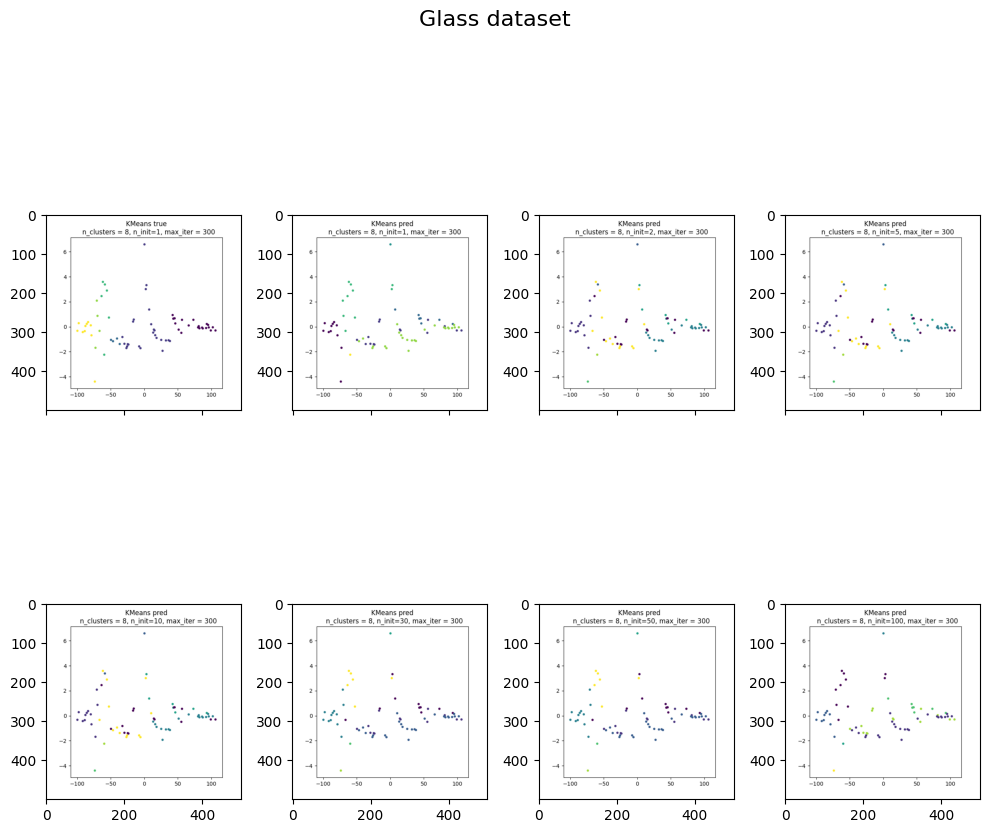

In [18]:
combineFigsInOnePlot(results_list[1], 'Glass dataset')

## Badanie liczby iteracji

In [19]:
study_vals = [10, 20, 50, 100, 300, 500, 1000]
results_list = [
[run_kmeans (df_seeds, max_iter = c) for c in study_vals],
[run_kmeans (df_glass, max_iter = c) for c in study_vals],
]


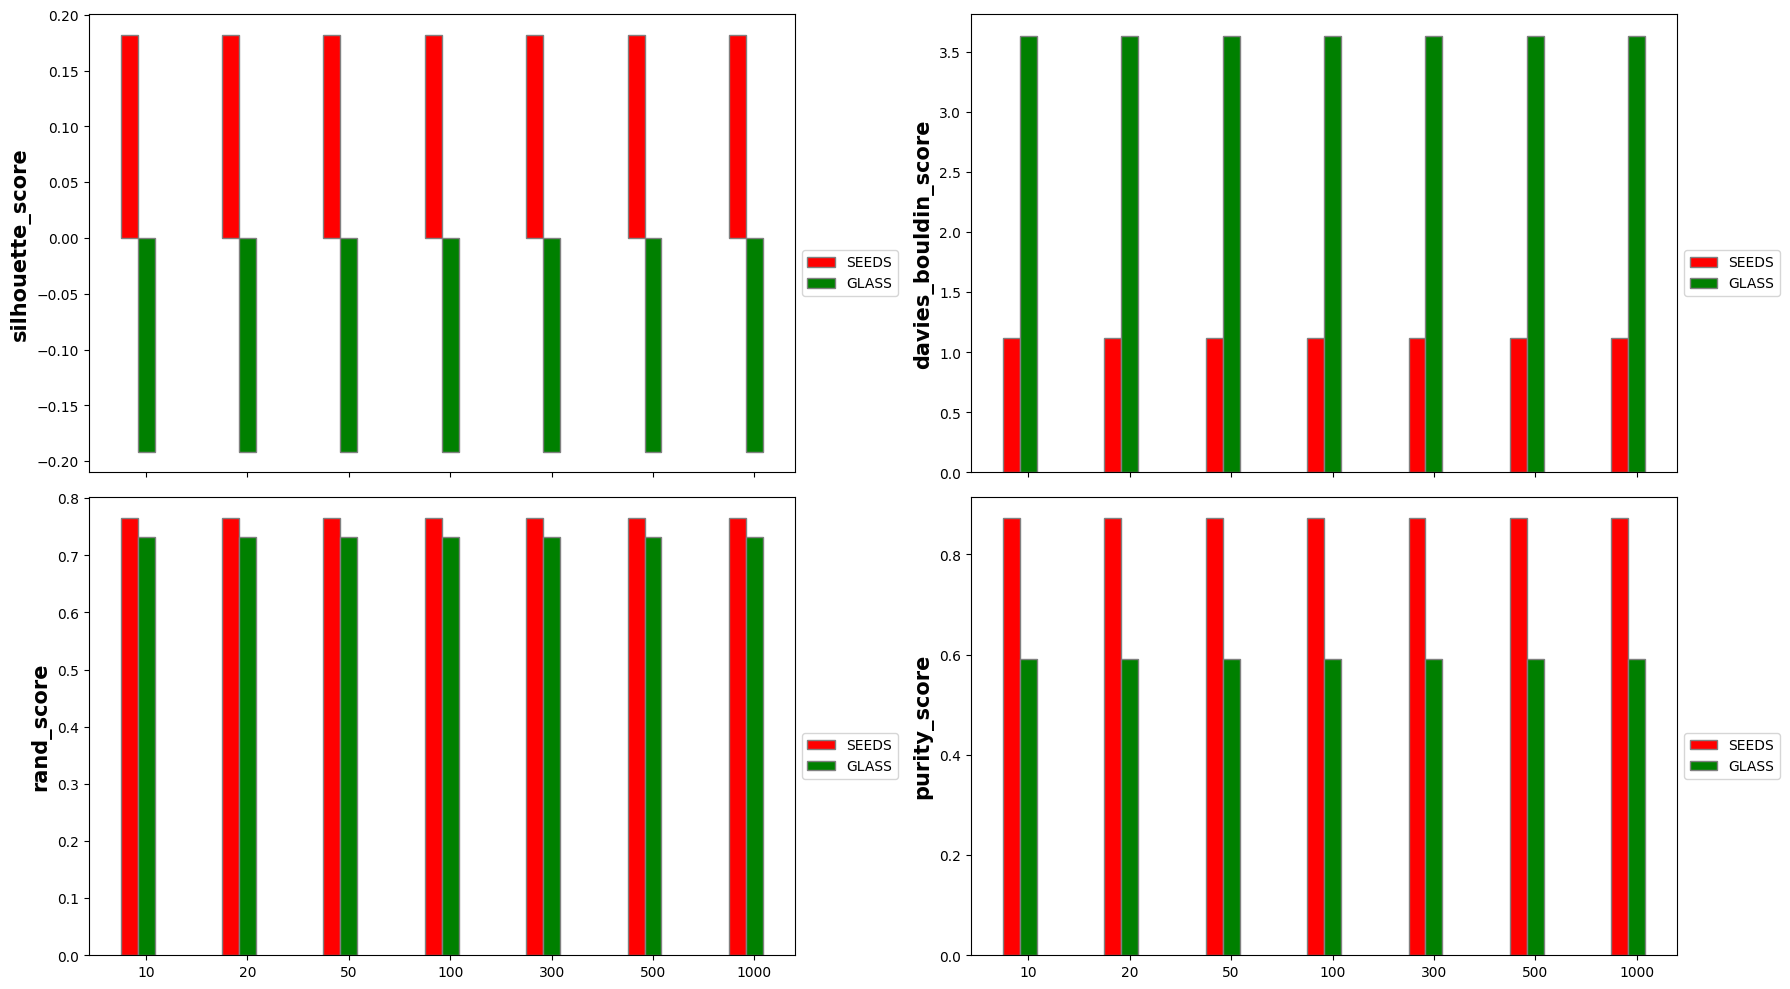

In [20]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

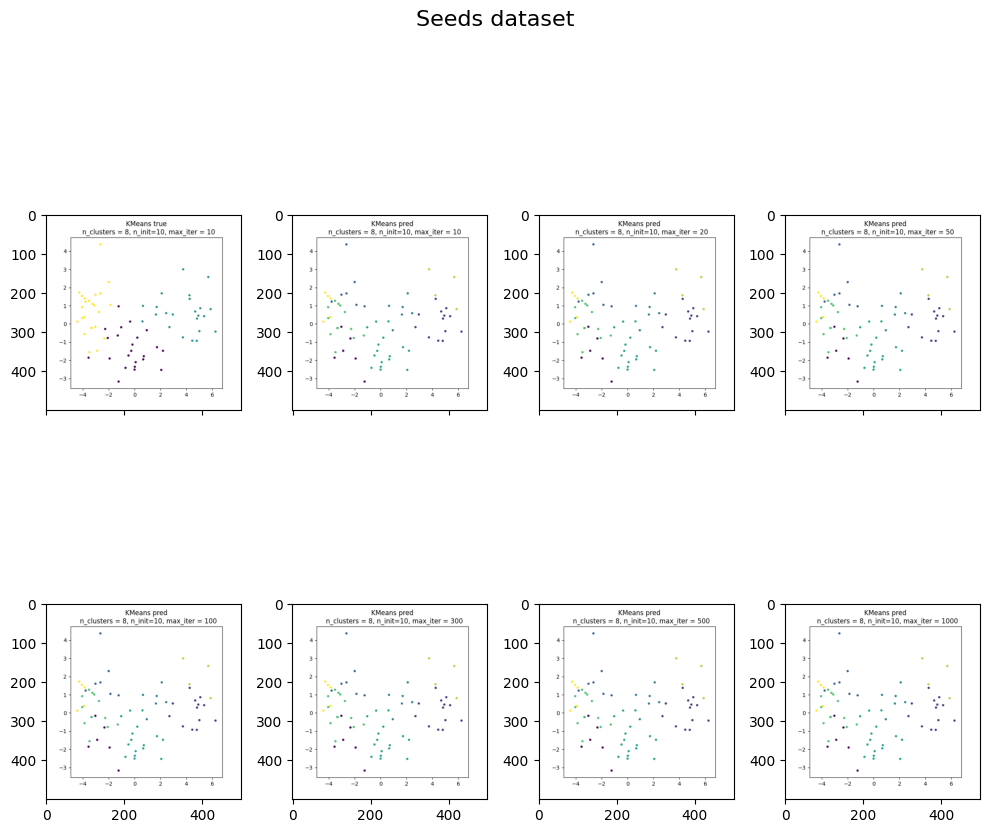

In [21]:
combineFigsInOnePlot(results_list[0], 'Seeds dataset')

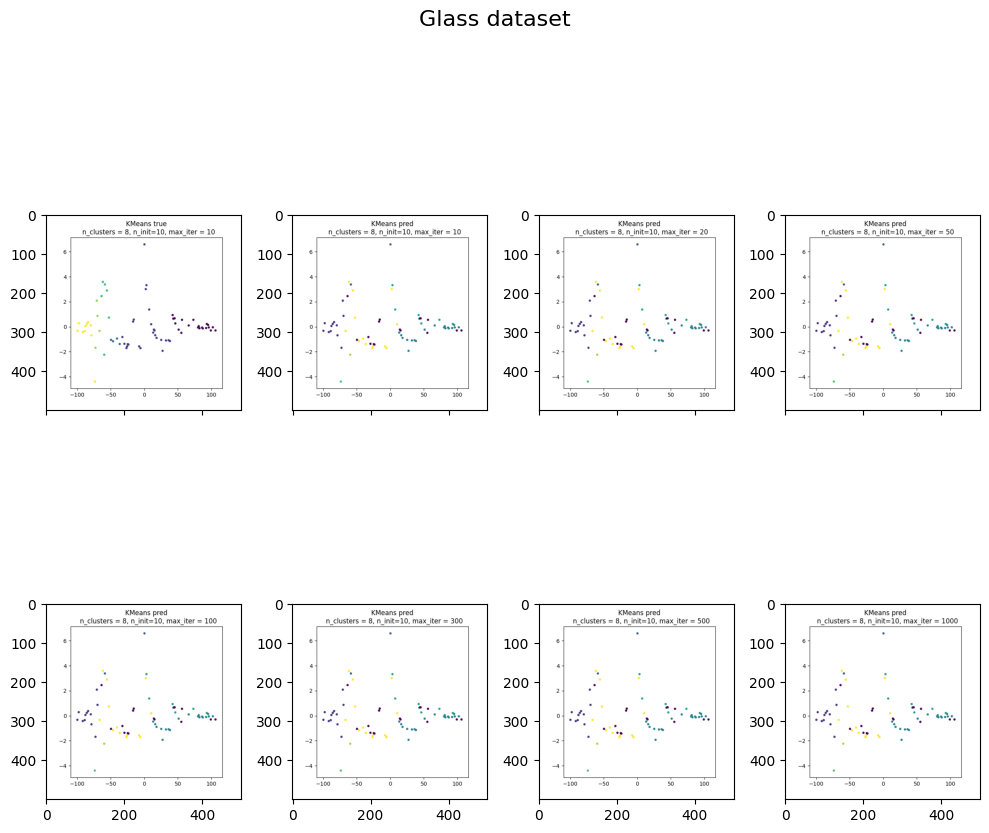

In [22]:
combineFigsInOnePlot(results_list[1], 'Glass dataset')

# Badanie DBSCAN 

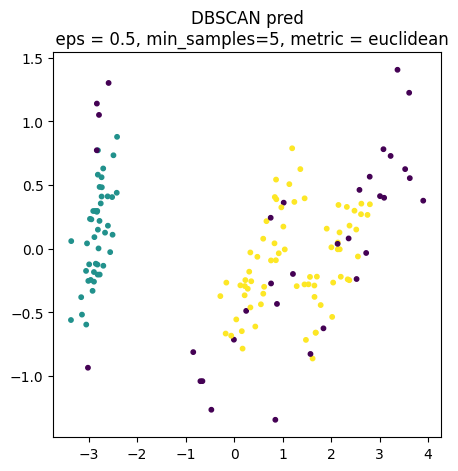

In [23]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.cluster import rand_score, contingency_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

def run_dbscan(df, eps = 0.5 , min_samples = 5, metric = 'euclidean', redmet = 'pca'):
    # df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)    
    clf = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
    clf = Pipeline([('imputate', SimpleImputer( strategy='mean')),
                    ('standardization', StandardScaler()),
                    ('clf', clf),])
    # clf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    # y_true = df_test.iloc[:, -1].tolist()
    y_true = df.iloc[:, -1].tolist()
    # y_pred = clf.predict(df_test.iloc[:, :-1])
    y_pred = clf.fit_predict(df.iloc[:, :-1])

    rand_sc = rand_score(y_true, y_pred)
    contingency_mat = contingency_matrix(y_true, y_pred)
    purity_sc = np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat) 


    silhouette_sc = silhouette_score(df.iloc[:, :-1], y_pred)
    davies_bouldin_sc = davies_bouldin_score(df.iloc[:, :-1], y_pred)
    X_reduced = []
    if redmet == 'pca':
        X_reduced = PCA(n_components=2).fit_transform(df)
    else:
        X_reduced = TSNE(n_components=2).fit_transform(df)

    pred_fig = plt.figure(1, figsize=(5, 5))
    ax1 = pred_fig.add_subplot()
    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_pred)
    ax1.set_title(f"DBSCAN pred\n  eps = {eps}, min_samples={min_samples}, metric = {metric}")
    plt.close()

    true_fig = plt.figure(2, figsize=(5, 5))
    ax2 = true_fig.add_subplot()
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_true)
    ax2.set_title(f"DBSCAN true\n  eps = {eps}, min_samples={min_samples}, metric = {metric}")
    plt.close()

    
    return {'silhouette_score': silhouette_sc, 'davies_bouldin_score': davies_bouldin_sc,
             'rand_score': rand_sc, 'purity_score': purity_sc ,
              'pred_fig': pred_fig, 'true_fig': true_fig,}

test_run = run_dbscan(df_iris)
test_run['pred_fig']

## Badanie epsilon

In [24]:

study_vals = [ 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.2, 1.4, 1.6]
results_list = [
[run_dbscan (df_seeds, eps = c) for c in study_vals],
[run_dbscan (df_glass, eps = c) for c in study_vals],
]


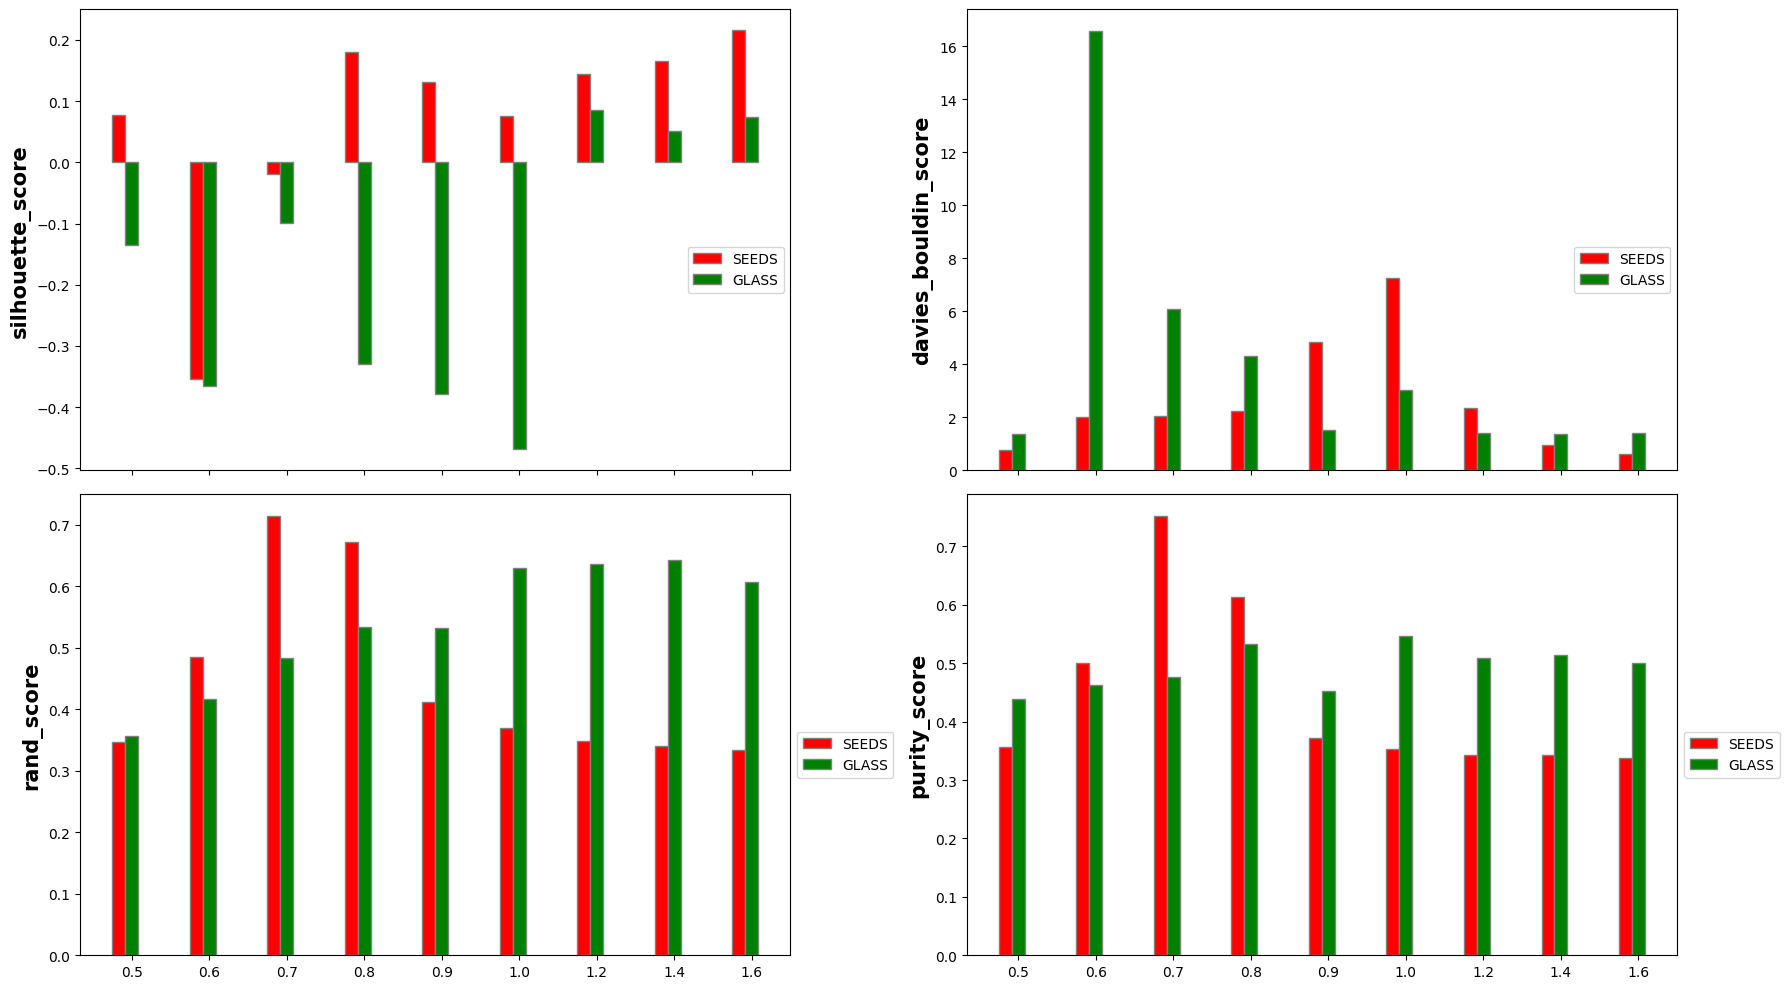

In [25]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

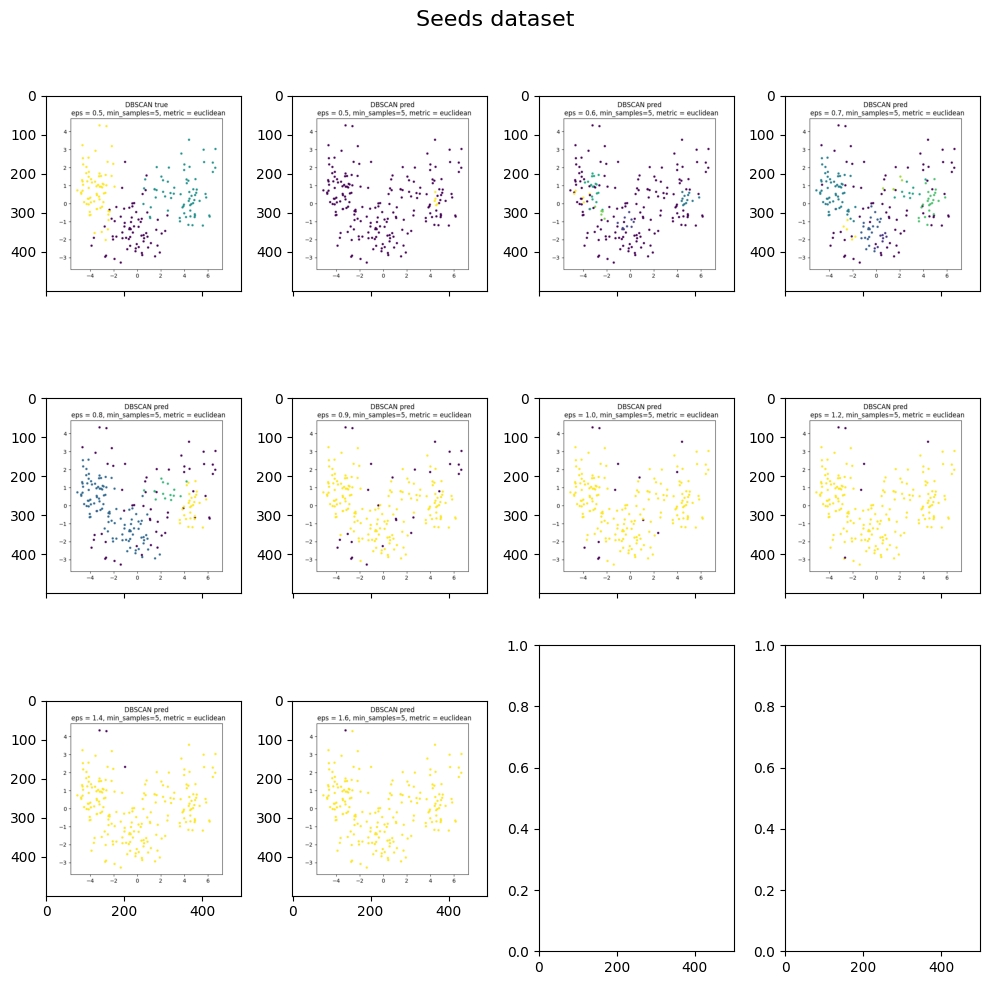

In [26]:
combineFigsInOnePlot(results_list[0], 'Seeds dataset')

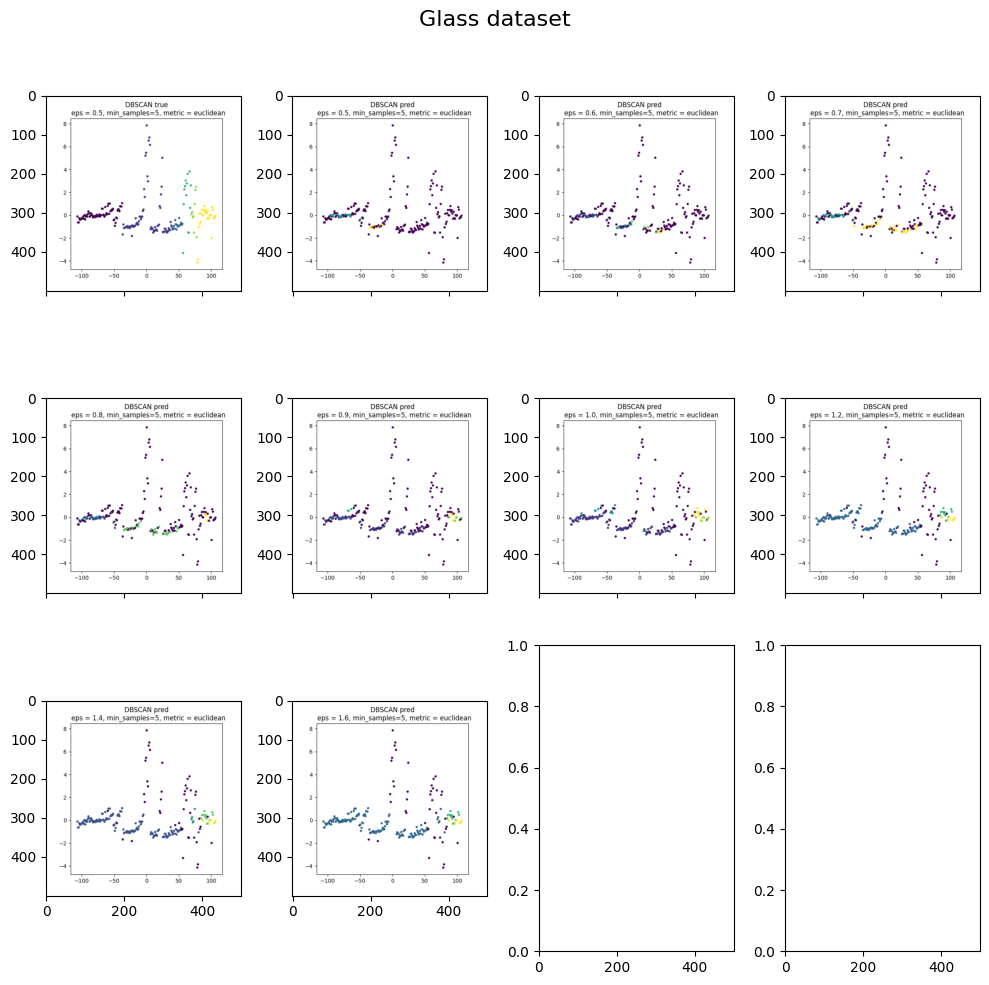

In [27]:
combineFigsInOnePlot(results_list[1], 'Glass dataset')

## Badanie liczby próbek

In [28]:

study_vals = [1,3,5]
results_list = [
[run_dbscan (df_seeds, min_samples = c) for c in study_vals],
[run_dbscan (df_glass, min_samples = c) for c in study_vals],
]

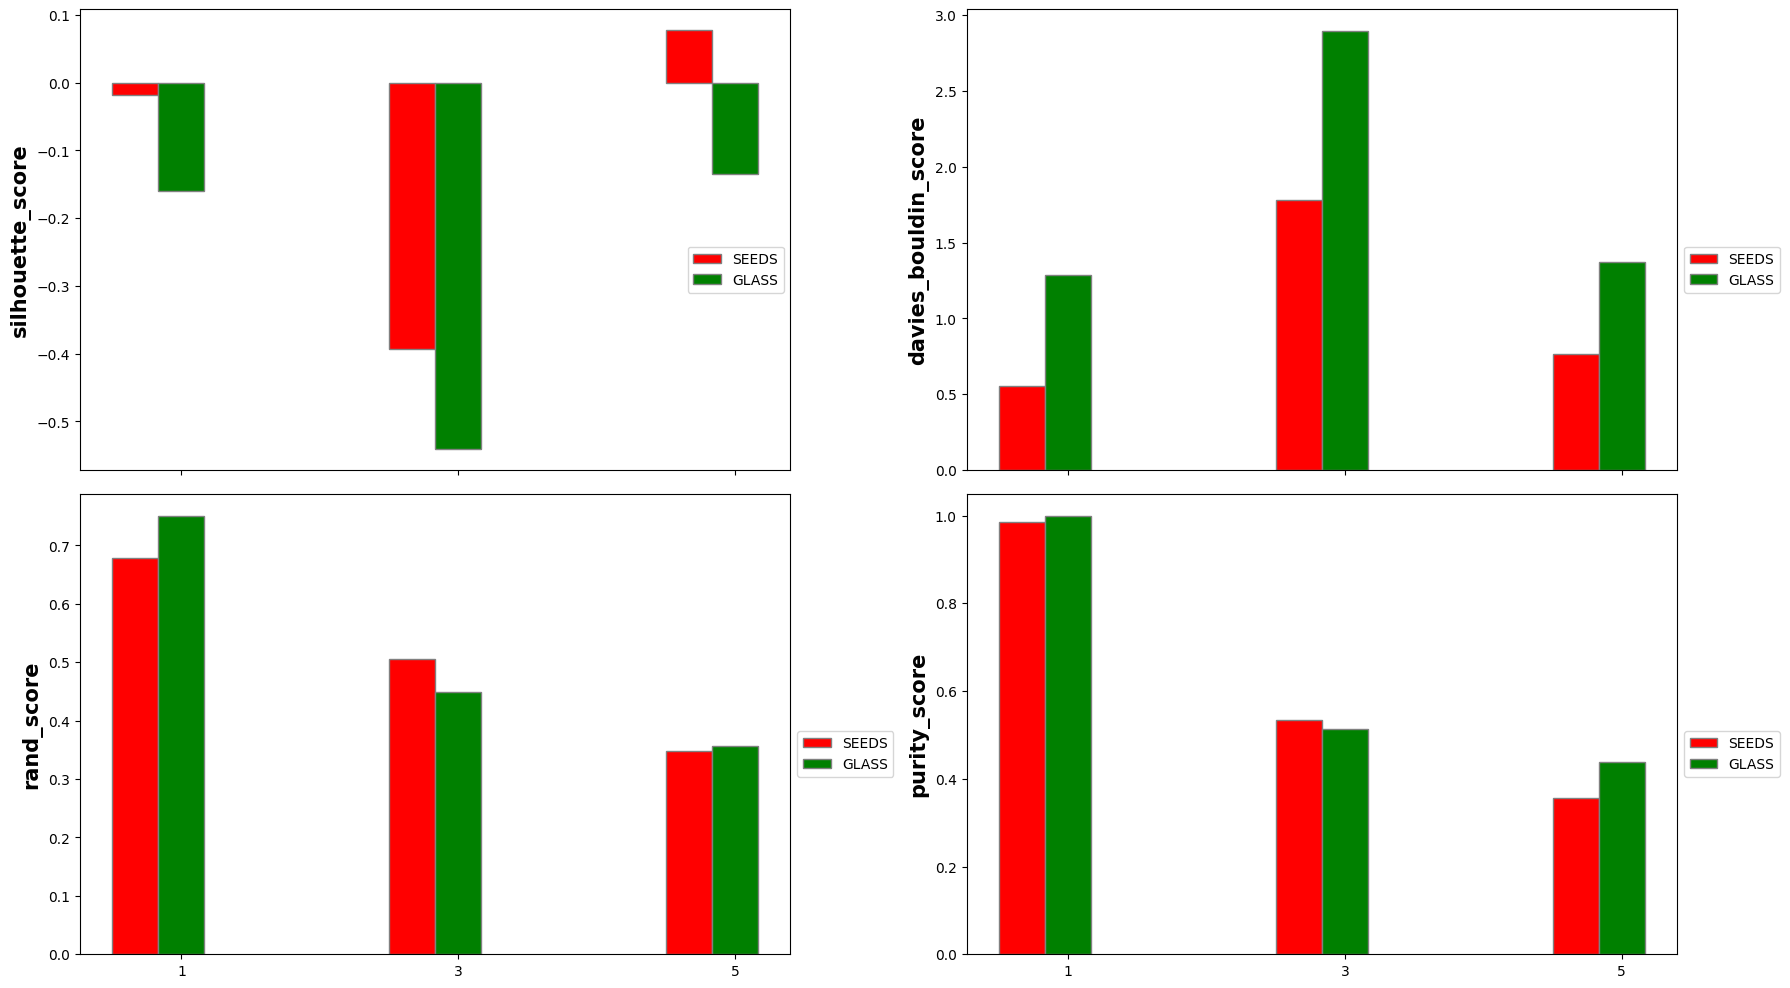

In [29]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

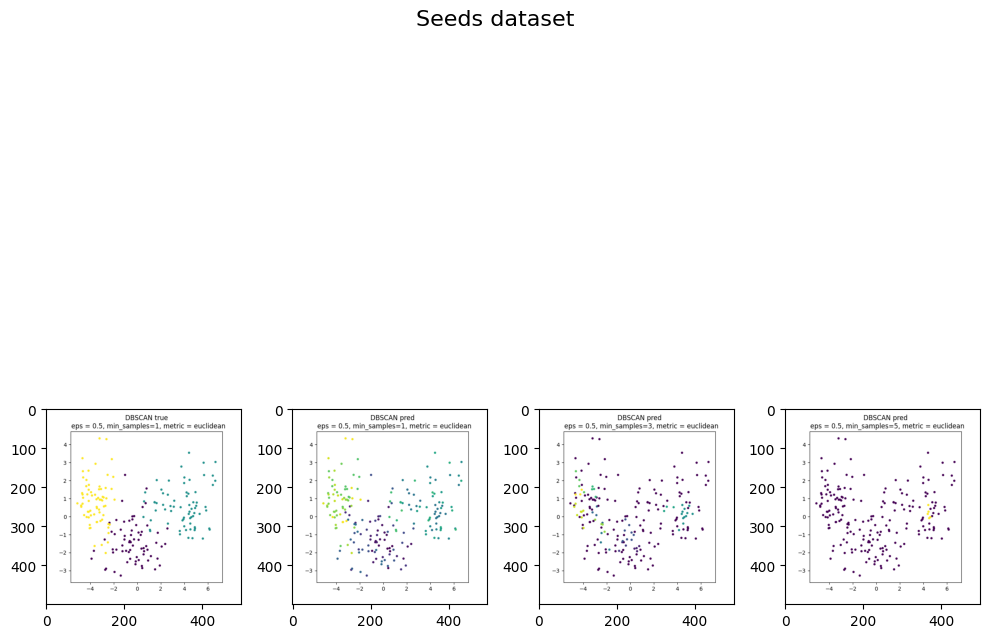

In [30]:
combineFigsInOnePlot(results_list[0], 'Seeds dataset')

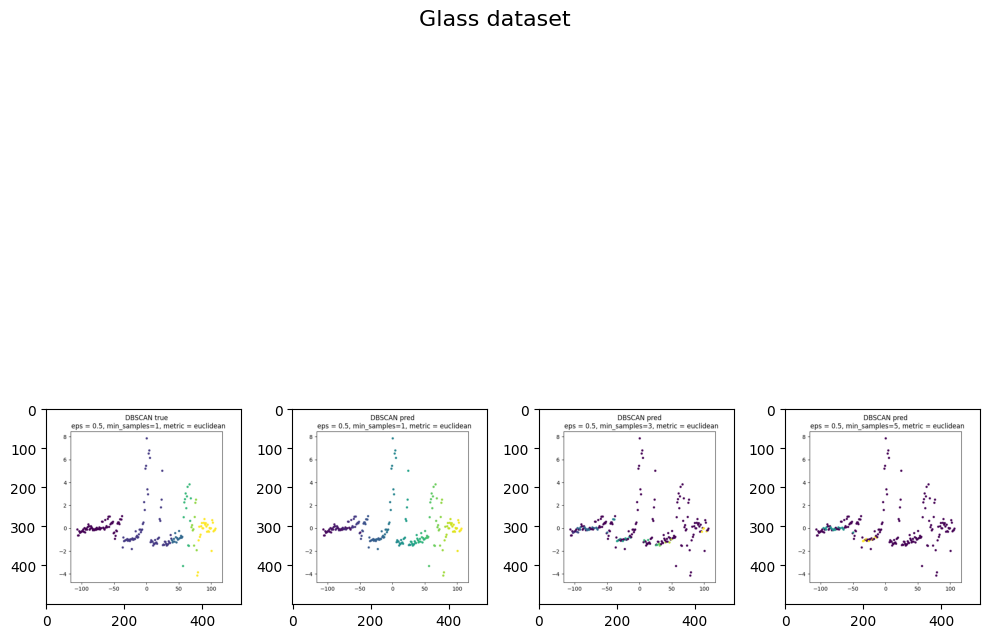

In [31]:
combineFigsInOnePlot(results_list[1], 'Glass dataset')

## Badanie miar odległości

### default epsilon

In [32]:

study_vals = ['euclidean', 'chebyshev', 'l2', 'nan_euclidean']
results_list = [
[run_dbscan (df_seeds, metric = c) for c in study_vals],
[run_dbscan (df_glass, metric = c) for c in study_vals],
]

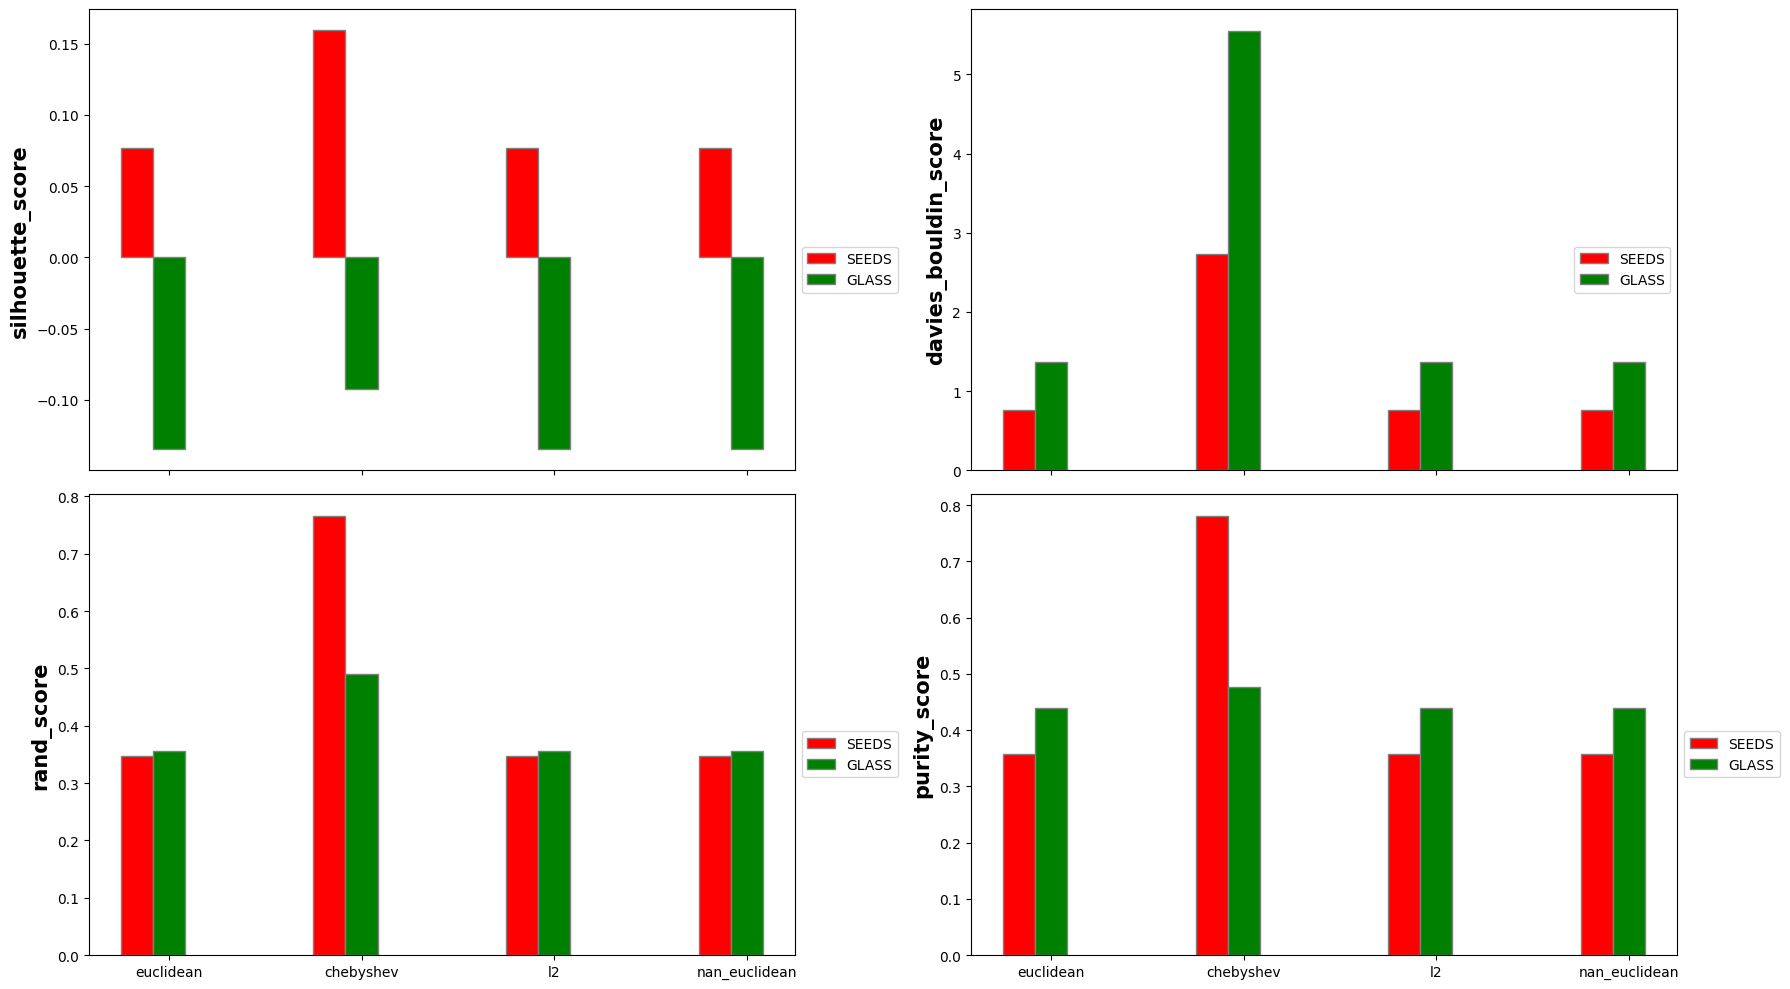

In [33]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

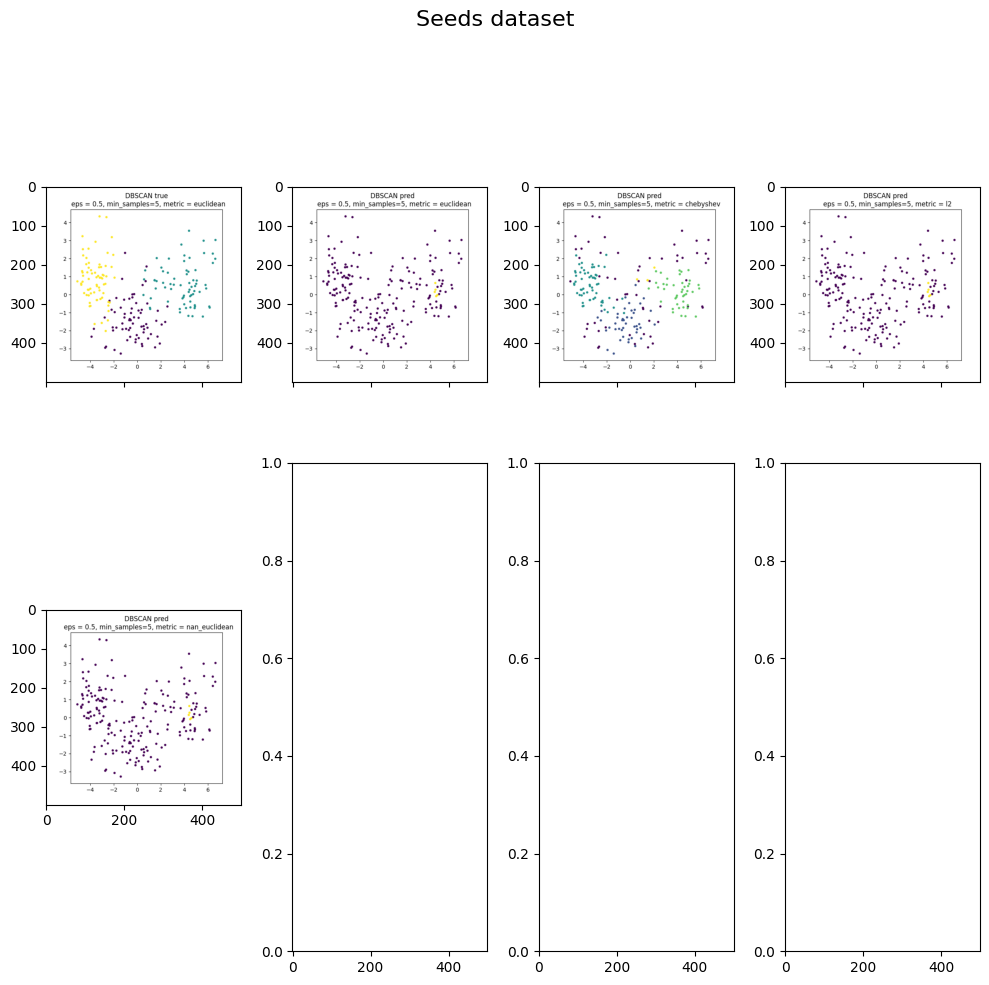

In [34]:
combineFigsInOnePlot(results_list[0], 'Seeds dataset')

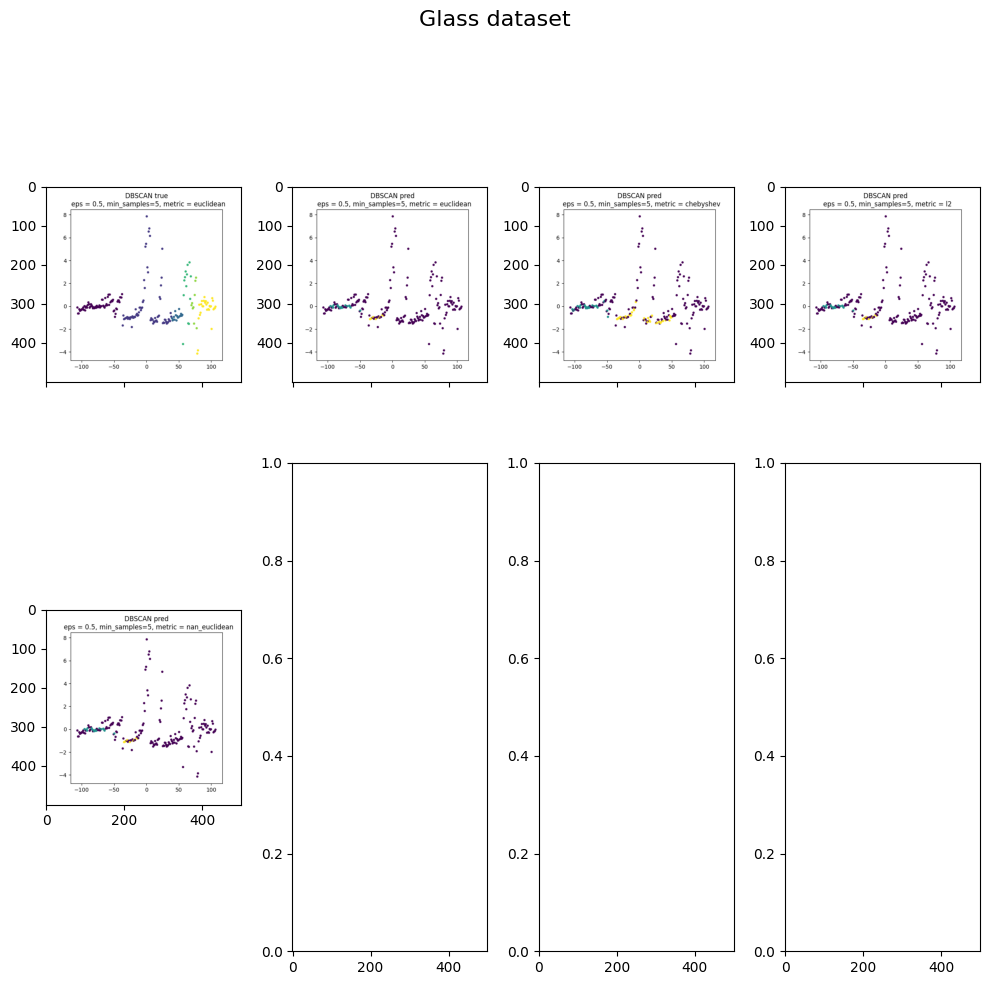

In [35]:
combineFigsInOnePlot(results_list[1], 'Glass dataset')

### set epsilon

In [36]:

study_vals = ['euclidean', 'chebyshev', 'l2', 'nan_euclidean']
results_list = [
[run_dbscan (df_seeds, metric = c, eps = 0.8) for c in study_vals],
[run_dbscan (df_glass, metric = c, eps = 0.8) for c in study_vals],
]

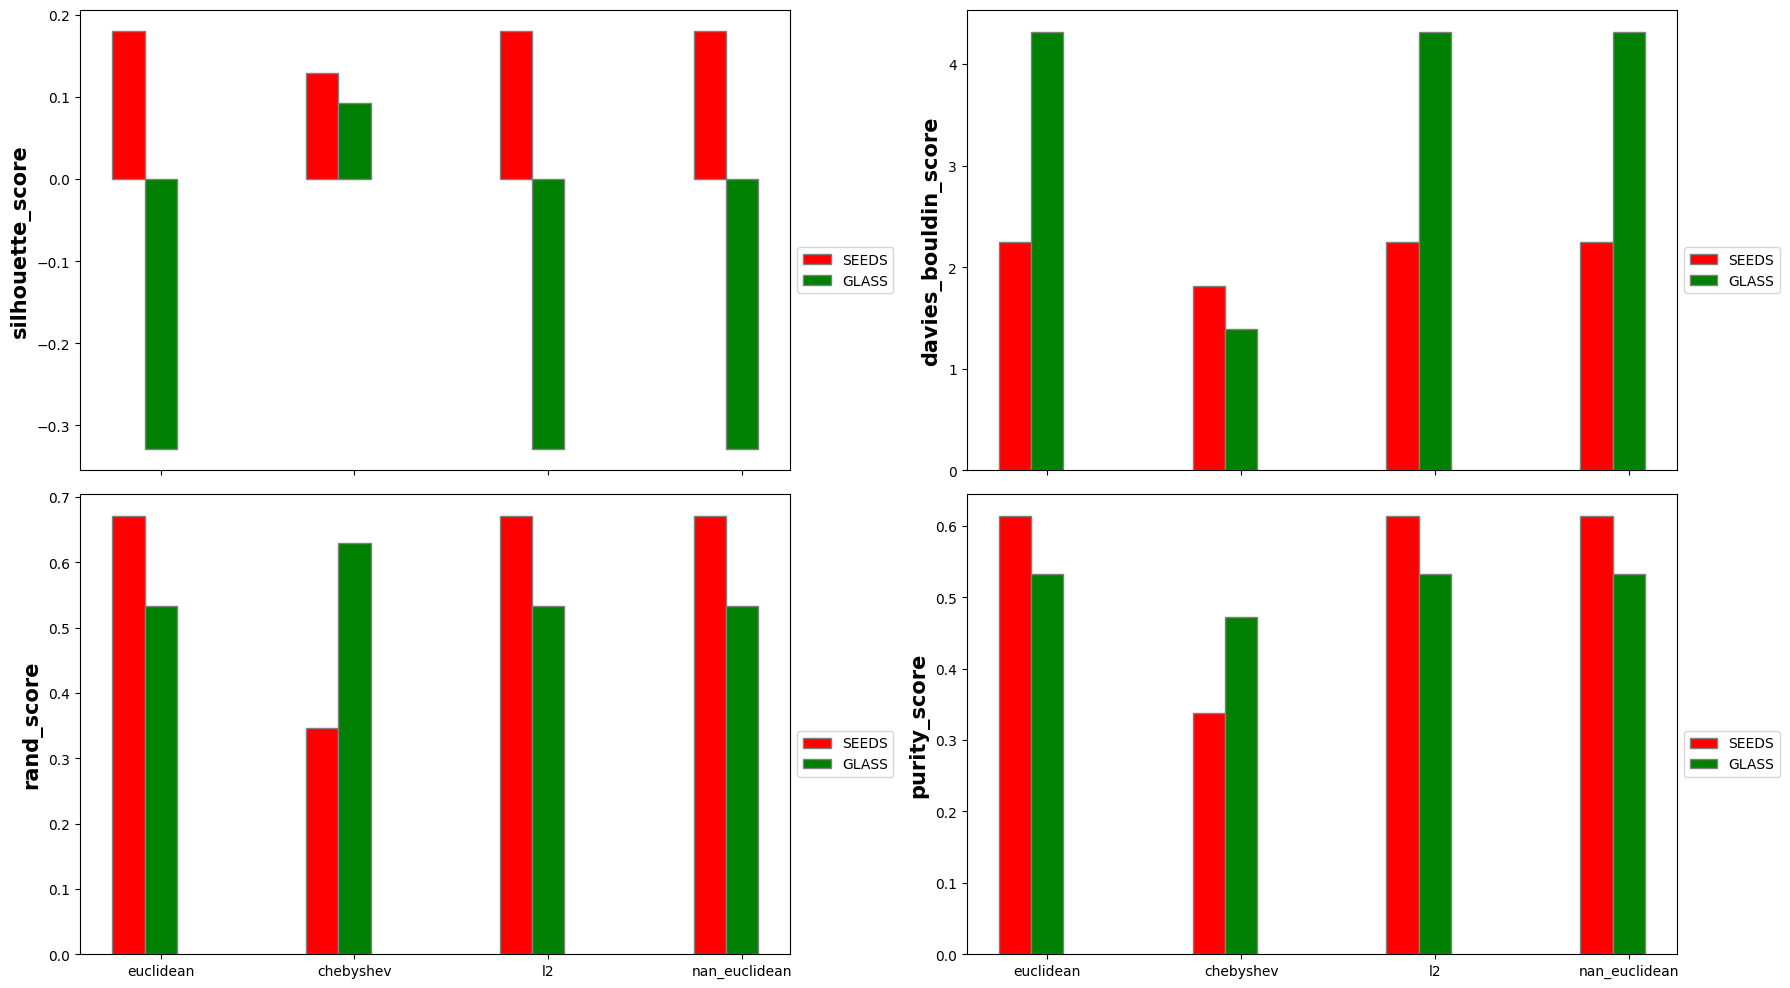

In [37]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

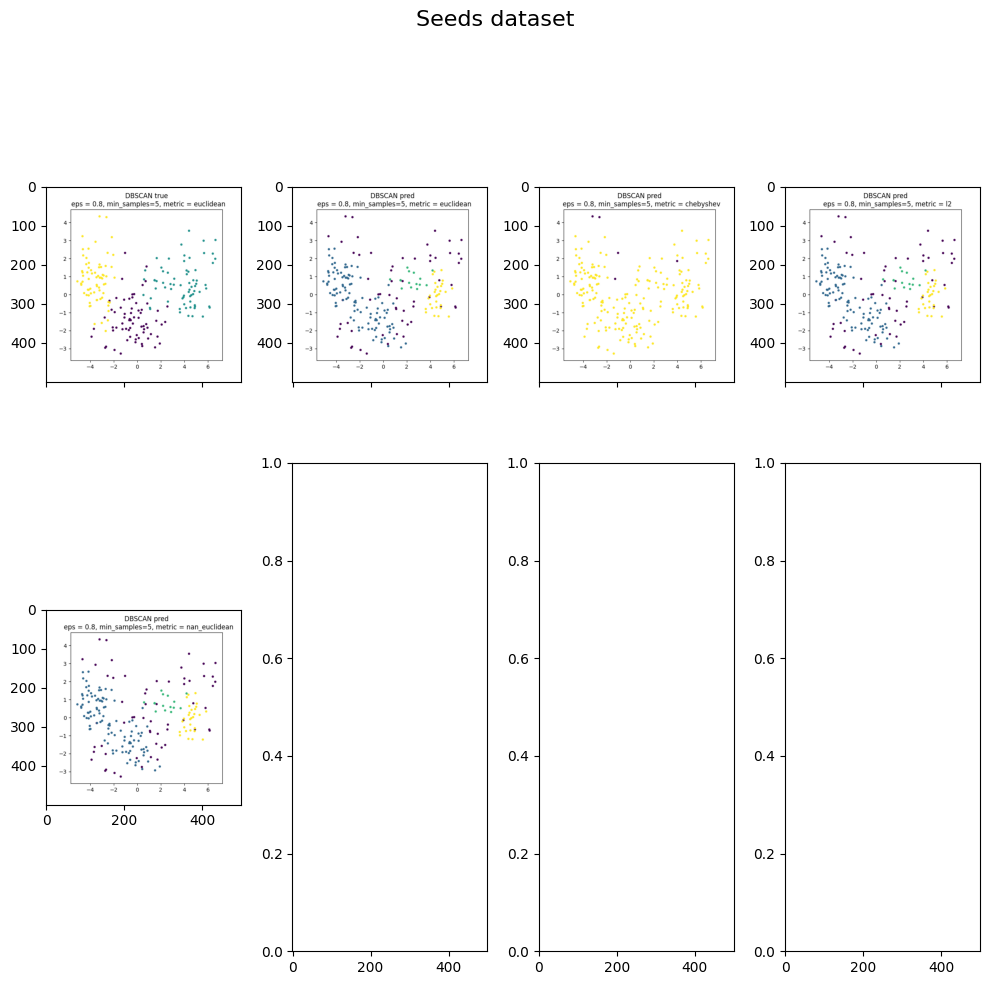

In [38]:
combineFigsInOnePlot(results_list[0], 'Seeds dataset')

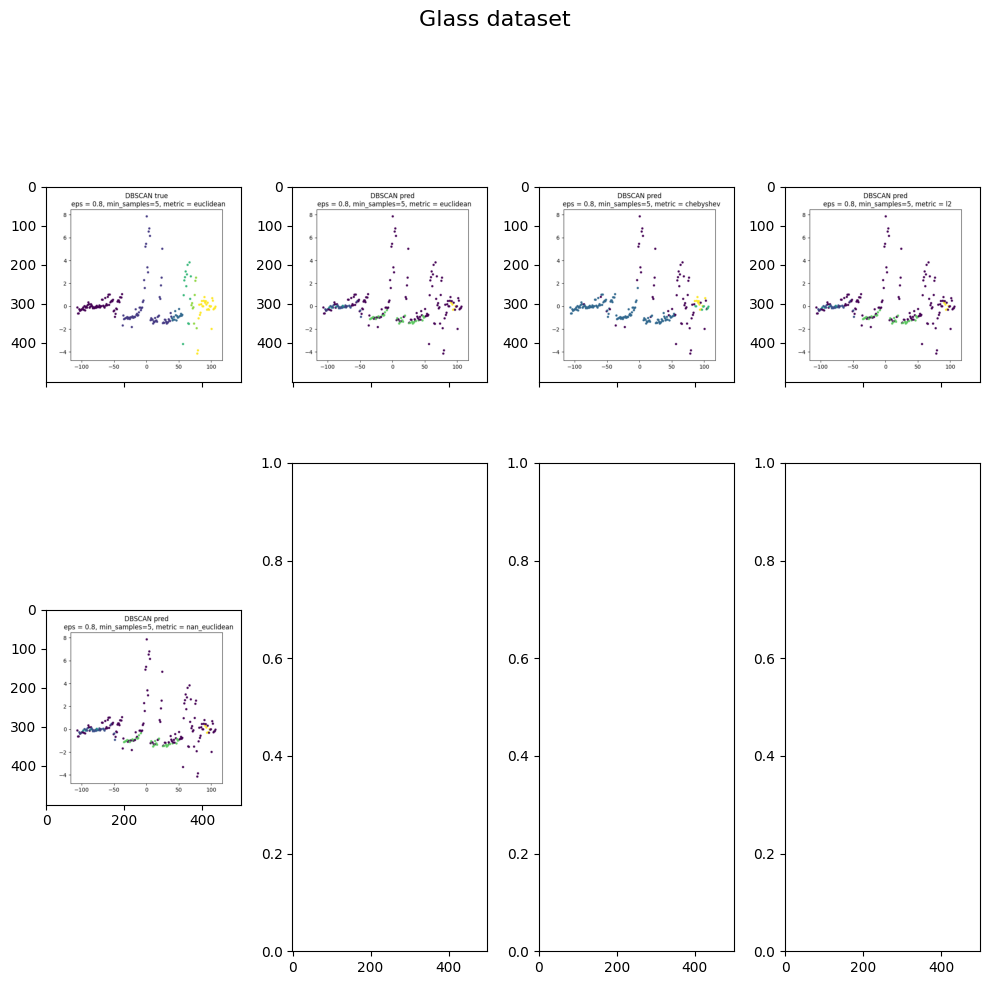

In [39]:
combineFigsInOnePlot(results_list[1], 'Glass dataset')

# Badanie najlepszej configuracji DBSCAN dla zbioru PCB

In [40]:
df_bank_test, df_bank_val = train_test_split( df_bank, test_size=0.10, random_state=42, stratify= df_bank.iloc[:, -1]) 

In [ ]:
raise Exception()

In [ ]:
from IPython.display import clear_output

eps_list = [ 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.4, 1.6, 2, 3, 4, 5]
mins_list = [1,3,5,8,10,12,15,20]
metric_list = ['euclidean', 'chebyshev', 'l2', 'nan_euclidean']

bank_results_list = []

# df_bank_val.shape

all_steps = len(eps_list) * len(mins_list) * len(metric_list)
counter = 0
for e in eps_list:
    for mi in mins_list:
        for m in metric_list:
            bank_results_list.append(run_dbscan (df_bank_val, eps = e, min_samples = mi, metric = m))
            clear_output(wait=True)
            counter = counter + 1
            print(counter, '/', all_steps)


448 / 448


In [ ]:
bank_best_silh = max(bank_results_list, key = lambda x : x[metrics_list[0]])
bank_best_silh

{'silhouette_score': 0.9361624672200229,
 'davies_bouldin_score': 2.6024507554023706,
 'rand_score': 0.8893913674884315,
 'purity_score': 0.9518544114259387,
 'pred_fig': <Figure size 500x500 with 1 Axes>,
 'true_fig': <Figure size 500x500 with 1 Axes>}

In [ ]:
bank_best_davis = min(bank_results_list, key = lambda x : x[metrics_list[1]])
bank_best_davis

{'silhouette_score': -0.7672853360818014,
 'davies_bouldin_score': 0.9281915072745467,
 'rand_score': 0.8896939162226631,
 'purity_score': 0.9525454964293941,
 'pred_fig': <Figure size 500x500 with 1 Axes>,
 'true_fig': <Figure size 500x500 with 1 Axes>}

In [ ]:
bank_best_rand = max(bank_results_list, key = lambda x : x[metrics_list[2]])
bank_best_rand

{'silhouette_score': 0.9354963489058367,
 'davies_bouldin_score': 2.638053268118502,
 'rand_score': 0.8897981628391598,
 'purity_score': 0.9518544114259387,
 'pred_fig': <Figure size 500x500 with 1 Axes>,
 'true_fig': <Figure size 500x500 with 1 Axes>}

In [ ]:
bank_best_pur = max(bank_results_list, key = lambda x : x[metrics_list[3]])
bank_best_pur

{'silhouette_score': -0.27243009504557547,
 'davies_bouldin_score': 1.9452258649233685,
 'rand_score': 0.1292055070239077,
 'purity_score': 0.9877908316056209,
 'pred_fig': <Figure size 500x500 with 1 Axes>,
 'true_fig': <Figure size 500x500 with 1 Axes>}

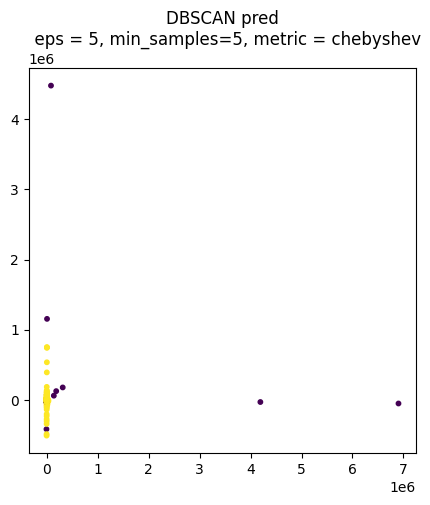

In [ ]:
bank_best_rand['pred_fig']

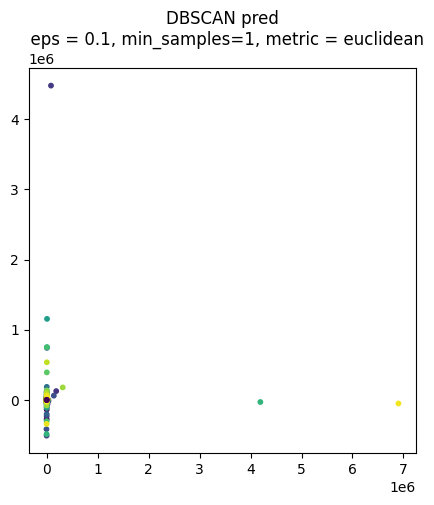

In [ ]:
bank_best_pur['pred_fig']

In [ ]:
_, df_bank_test2 = train_test_split( df_bank_test, test_size=0.7, random_state=42, stratify= df_bank_test.iloc[:, -1]) 
# _, df_bank_test2 = train_test_split( df_bank_test, test_size=0.8, random_state=42, stratify= df_bank_test.iloc[:, -1]) 
df_bank_test2.shape

(27345, 65)

In [ ]:
bank_test_results = run_dbscan (df_bank_test2, eps = 5, min_samples = 5, metric = 'chebyshev')

In [ ]:
bank_test_results

{'silhouette_score': 0.6225036140109867,
 'davies_bouldin_score': 2.708785668292109,
 'rand_score': 0.8985183123217719,
 'purity_score': 0.9518376302797587,
 'pred_fig': <Figure size 500x500 with 1 Axes>,
 'true_fig': <Figure size 500x500 with 1 Axes>}

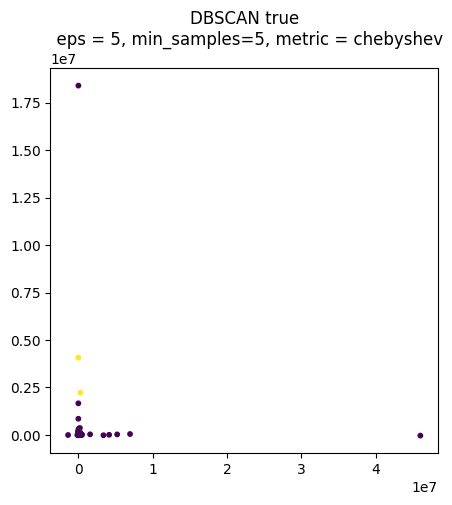

In [ ]:
bank_test_results['true_fig']

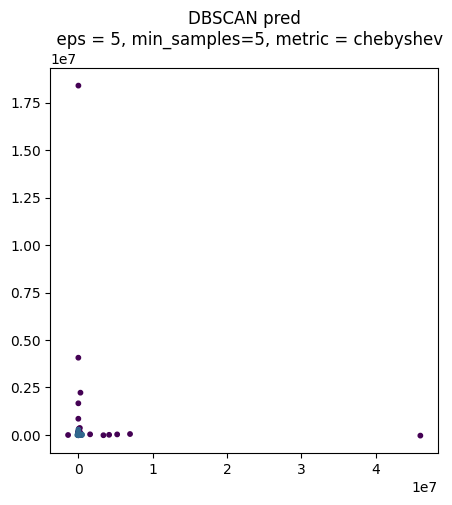

In [ ]:
bank_test_results['pred_fig']

In [ ]:
bank_test_results = run_dbscan (df_bank_test2, eps = 5, min_samples = 5, metric = 'chebyshev', redmet='tsne')

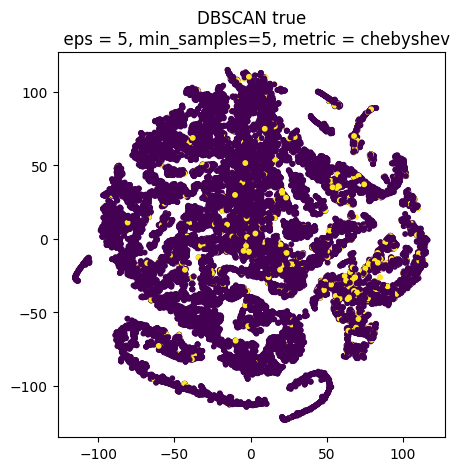

In [ ]:
bank_test_results['true_fig']

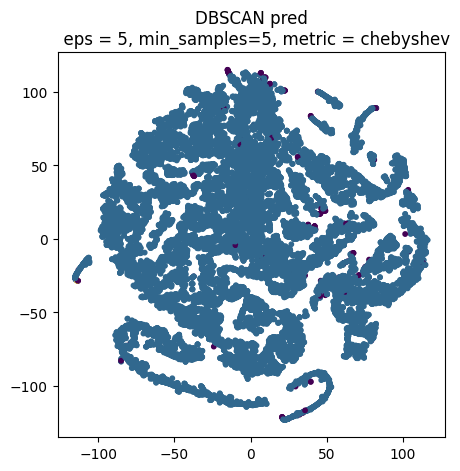

In [ ]:
bank_test_results['pred_fig']